# Aplicación de análisis del caso

Casos disponibles:
- Amanda 2024 [Realizado]
- Amanda 2023 [Realizado]
- Adela 2024 [Realizado]
- Adela 2023 [Realizado]
- Adela 2022 [Falta comprobar consentimiento]

In [47]:
caso = "Adela 2023"
resultados_img = f"../resultados/{caso}/"

### Guardar datos del caso por sección

In [48]:
import pandas as pd
import os 
import warnings

# Ignorar advertencias específicas de openpyxl
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

print(f"Caso seleccionado: {caso}")

# PATH a las carpetas de datos
ANSWERS_DATA_PATH = f'../data/answers/{caso}'
FOLDERS_ANSWERS = os.listdir(ANSWERS_DATA_PATH)

# Dataframe para almacenar los datos
df_answers = pd.DataFrame(columns=['df', 'opt_left', 'Grup', 'Ind1', 'Ind2', 'Magnitud_Ind1_Grup', 'Magnitud_Grup_Ind2', 
                                'Magnitud_Ind1_Ind2', 'Cambio_postura_Ind1_Grup', 'Cambio_postura_Grup_Ind2', 
                                'Cambio_postura_Ind1_Ind2', 'Nivel_Ind1_Grup', 'Nivel_Grup_Ind2', 'Nivel_Ind1_Ind2', 
                                'Direccion_Ind1_Grup', 'Direccion_Grup_Ind2', 'Direccion_Ind1_Ind2', 
                                'Comentario - Ind1 - Diferencial 1', 'Comentario - Ind1 - Diferencial 2', 
                                'Comentario - Grup - Diferencial 1', 'Comentario - Grup - Diferencial 2', 
                                'Comentario - Ind2 - Diferencial 1', 'Comentario - Ind2 - Diferencial 2', 'agno', 'seccion'])

# Leer archivos excel del directorio y extraer agno y seccion
filas = 0
for file in FOLDERS_ANSWERS:
    parts = file.split('_')  
    if len(parts) >= 3: 
        agno = parts[1]  
        seccion = parts[-1][:-5] 
        print(f"Archivo: {file}, Año: {agno}, Sección: {seccion}")
    else:
        print(f"==== Error en extracción de año y sección para el archivo: {file} ====")
        agno = None
        seccion = None
    
    # Extracción de columnas
    df = pd.read_excel(f'{ANSWERS_DATA_PATH}/{file}', sheet_name='Datos')
    """
    df = df[['df', 'opt_left', 'Grup', 'Ind1', 'Ind2', 'Magnitud_Ind1_Grup', 'Magnitud_Grup_Ind2', 
            'Magnitud_Ind1_Ind2', 'Cambio_postura_Ind1_Grup', 'Cambio_postura_Grup_Ind2', 
            'Cambio_postura_Ind1_Ind2', 'Nivel_Ind1_Grup', 'Nivel_Grup_Ind2', 'Nivel_Ind1_Ind2', 
            'Direccion_Ind1_Grup', 'Direccion_Grup_Ind2', 'Direccion_Ind1_Ind2', 
            'Comentario - Ind1 - Diferencial 1', 'Comentario - Ind1 - Diferencial 2', 
            'Comentario - Grup - Diferencial 1', 'Comentario - Grup - Diferencial 2', 
            'Comentario - Ind2 - Diferencial 1', 'Comentario - Ind2 - Diferencial 2']]
    """
    df = df[['df', 'opt_left', 'Grup', 'Ind1', 'Ind2',
        'Comentario - Ind1 - Diferencial 1', 'Comentario - Ind1 - Diferencial 2', 
        'Comentario - Grup - Diferencial 1', 'Comentario - Grup - Diferencial 2', 
        'Comentario - Ind2 - Diferencial 1', 'Comentario - Ind2 - Diferencial 2']]
    # Añadir columnas de agno y seccion
    df['agno'] = agno
    df['seccion'] = seccion
    filas += len(df)
    df_answers = pd.concat([df_answers, df], ignore_index=True)

# Sort, fillna y convertir columnas a string
df_answers.sort_values(by=['Grup', 'seccion', 'agno'], inplace=True)
df_answers.fillna('', inplace=True)

# Convertir las columnas especificadas a tipo string
columnas_a_convertir = [
    'Comentario - Ind1 - Diferencial 1',
    'Comentario - Grup - Diferencial 1',
    'Comentario - Ind2 - Diferencial 1',
    'Comentario - Ind1 - Diferencial 2',
    'Comentario - Grup - Diferencial 2',
    'Comentario - Ind2 - Diferencial 2'
]

# Convertir las columnas a string
for columna in columnas_a_convertir:
    df_answers[columna] = df_answers[columna].astype(str)

# Ruta para almacenar los datos procesados
folder_path = f'processed_data/{caso}'

# Verificar si la carpeta existe, y si no, crearla
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"\nCarpeta creada: {folder_path}")
else:
    print(f"\nCarpeta ya existe: {folder_path}")

# Guardar datos como un nuevo csv en una ruta
df_answers.to_csv(f'../processed_data/{caso}/answers_by_secc_{caso}.csv', index=False)
print(f"Datos procesados guardados en: {folder_path}/answers_by_secc_{caso}.csv")
print(f"Total de filas: {filas} y filas del archivo: {len(df_answers)}")

Caso seleccionado: Adela 2023
Archivo: Procesamient_2023_CD1100_2.xlsx, Año: 2023, Sección: 2
Archivo: Procesamient_2023_CD1100_3.xlsx, Año: 2023, Sección: 3
Archivo: Procesamient_2023_CD1100_5.xlsx, Año: 2023, Sección: 5
Archivo: Procesamient_2023_CD1100_6.xlsx, Año: 2023, Sección: 6
Archivo: Procesamient_2023_CD1100_8.xlsx, Año: 2023, Sección: 8

Carpeta creada: processed_data/Adela 2023
Datos procesados guardados en: processed_data/Adela 2023/answers_by_secc_Adela 2023.csv
Total de filas: 862 y filas del archivo: 862


### Cargar conjunto de datos

In [49]:
import pandas as pd

folder_path = f'processed_data/{caso}'
df_caso = pd.read_csv(f'../{folder_path}/answers_by_secc_{caso}.csv', sep=',')

# Reducir a 20 filas
#df_caso = df_caso.head(20).sort_values(by=['agno', 'seccion', 'Grup'])

df_caso = df_caso.sort_values(by=['Grup', 'seccion', 'agno'])
df_caso = df_caso.fillna('')

# Columnas con respuestas
columnas_a_convertir = [
    'Comentario - Ind1 - Diferencial 1',
    'Comentario - Grup - Diferencial 1',
    'Comentario - Ind2 - Diferencial 1',
    'Comentario - Ind1 - Diferencial 2',
    'Comentario - Grup - Diferencial 2',
    'Comentario - Ind2 - Diferencial 2'
]

# Convertir las columnas a string
for columna in columnas_a_convertir:
    df_caso[columna] = df_caso[columna].astype(str)

Distinción por diferenciales

In [50]:
# Agrupar por diferencial 1 y diferencial 2
# diferencial 1 conserva las columnas: 'Grup', 'Comentario - Ind1 - Diferencial 1', 'Comentario - Grup - Diferencial 1', 'Comentario - Ind2 - Diferencial 1' para df=1
df_df1 = df_caso[df_caso['df'] == 1][['Grup', 
                                   'Comentario - Ind1 - Diferencial 1', 
                                   'Comentario - Grup - Diferencial 1', 
                                   'Comentario - Ind2 - Diferencial 1', 'agno', 'seccion']]

# diferencial 2 conserva las columnas: 'Grup', 'Comentario - Ind1 - Diferencial 2', 'Comentario - Grup - Diferencial 2', 'Comentario - Ind2 - Diferencial 2' para df=2
df_df2 = df_caso[df_caso['df'] == 2][['Grup', 
                                   'Comentario - Ind1 - Diferencial 2', 
                                   'Comentario - Grup - Diferencial 2', 
                                   'Comentario - Ind2 - Diferencial 2', 'agno', 'seccion']]

## Análisis Gramatical

In [ ]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
# Importar las funciones del archivo software.py ubicado en la carpeta software_development
import sys
sys.path.append('../utils')
from model__1 import *

In [ ]:
def aplicar_dependencias_grupal(df, diferencial, col_ind1, col_grup, col_ind2):
    df['Ind1_d'] = df[col_ind1].apply(lambda x: analizar_dependencias(str(x)))
    df['Ind2_d'] = df[col_ind2].apply(lambda x: analizar_dependencias(str(x)))
    
    grouped = df[['Grup', 'agno', 'seccion', col_grup]].drop_duplicates(subset=['Grup', 'agno', 'seccion'])
    grouped['Grup_d'] = grouped[col_grup].apply(lambda x: analizar_dependencias(str(x)))
    df = df.merge(grouped[['Grup', 'agno', 'seccion', 'Grup_d']], 
                  on=['Grup', 'agno', 'seccion'], 
                  how='left')
    
    df.to_csv(f"../processed_data/{caso}/Tree_dependency_df{diferencial}.csv", index=False)
    return df

### Aplicar y guardar análisis

In [9]:
# Aplicar la función optimizada a ambos DataFrames
Tree_Dependency_d1 = aplicar_dependencias_grupal(df_df1, 1, 'Comentario - Ind1 - Diferencial 1', 
                                               'Comentario - Grup - Diferencial 1', 
                                               'Comentario - Ind2 - Diferencial 1')

Tree_Dependency_d2 = aplicar_dependencias_grupal(df_df2, 2, 'Comentario - Ind1 - Diferencial 2', 
                                               'Comentario - Grup - Diferencial 2', 
                                               'Comentario - Ind2 - Diferencial 2')

### Gráficos de analisis gramatical

In [10]:
# En caso de no ejecutar lo anterior, se pueden cargar los datos desde los csv
import pandas as pd
Tree_Dependency_d1 = pd.read_csv(f"../processed_data/{caso}/Tree_dependency_df1.csv")
Tree_Dependency_d2 = pd.read_csv(f"../processed_data/{caso}/Tree_dependency_df2.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================== CALCULOS ============================================== #
total_alumnos_df1 = Tree_Dependency_d1.shape[0]
total_alumnos_df2 = Tree_Dependency_d2.shape[0]
total_respuestas_df1 = total_alumnos_df1 * 3
total_respuestas_df2 = total_alumnos_df2 * 3
print("-------------------------------------------")
print(f"Total de alumnos en diferencial 1: {total_alumnos_df1}")
print(f"Total de alumnos en diferencial 2: {total_alumnos_df2}")
print(f"Total de respuestas en diferencial 1: {total_respuestas_df1}")
print(f"Total de respuestas en diferencial 2: {total_respuestas_df2}")
print("-------------------------------------------")

# ============================================== GRAFICOS ============================================== #
print("Generando gráficos...")
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))

# Datos para los boxplots
data_d1 = [Tree_Dependency_d1['Ind1_d'], Tree_Dependency_d1['Grup_d'], Tree_Dependency_d1['Ind2_d']]
data_d2 = [Tree_Dependency_d2['Ind1_d'], Tree_Dependency_d2['Grup_d'], Tree_Dependency_d2['Ind2_d']]

labels = ['Individual 1', 'Grupal', 'Individual 2']
positions_d1 = [1, 2, 3]  # Posiciones para diferencial 1
positions_d2 = [4, 5, 6]  # Posiciones para diferencial 2

# Crear boxplots
boxplot_d1 = plt.boxplot(
    data_d1,
    positions=positions_d1,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue'),
    medianprops=dict(color='darkblue'),
    flierprops=dict(markeredgecolor='blue')
)

boxplot_d2 = plt.boxplot(
    data_d2,
    positions=positions_d2,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen', color='green'),
    whiskerprops=dict(color='green'),
    capprops=dict(color='green'),
    medianprops=dict(color='darkgreen'),
    flierprops=dict(markeredgecolor='green')
)

# Etiquetas y formato
plt.xticks([1, 2, 3, 4, 5, 6], 
           ['Individual 1', 'Grupal', 'Individual 2', 
            'Individual 1', 'Grupal', 'Individual 2'])
plt.ylabel('Dependencias')
plt.title(f'Caso: {caso} - Oraciones subordinadas por etapa y diferencial', fontsize=16, pad=20, fontfamily='serif')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir leyenda
plt.legend([boxplot_d1["boxes"][0], boxplot_d2["boxes"][0]], 
           ['Diferencial 1', 'Diferencial 2'], 
           loc='upper right', fontsize=12)

# Información adicional
plt.figtext(
    0.5, -0.05, 
    f'Estudiantes diferencial 1: {total_alumnos_df1}\nEstudiantes diferencial 2: {total_alumnos_df2}', 
    ha='center', fontsize=10
)

# Guardar gráfico
plt.savefig(f"{resultados_img}/Analisis_Gramatical_boxplot_dependencias.png", bbox_inches='tight')
plt.close()

print("Gráfico de bloxplot generado")
# ============================================== GRAFICOS ============================================== #
diferenciales = []
for i, df in enumerate([Tree_Dependency_d1, Tree_Dependency_d2], start=1):
    total_alumnos = total_alumnos_df1 if i == 1 else total_alumnos_df2

    ind1_count = (df['Ind1_d'] < df['Ind2_d']).sum()
    grup_count = (df['Grup_d'] < df['Ind2_d']).sum()
    ind2_count = (df['Ind2_d'] < df['Ind1_d']).sum()
    # Porcentajes f"{num:.1f}"
    ind1_percentage = (ind1_count*100)/total_alumnos
    grup_percentage = (grup_count*100)/total_alumnos
    ind2_percentage = (ind2_count*100)/total_alumnos
    
    diferenciales.append([f'{i}', 'Individual 1 < Individual 2', ind1_count, f"{ind1_percentage:.1f}%"])
    diferenciales.append([f'{i}', 'Grupal < Individual 2', grup_count, f"{grup_percentage:.1f}%"])
    diferenciales.append([f'{i}', 'Individual 2 < Individual 1', ind2_count, f"{ind2_percentage:.1f}%"])

df_table = pd.DataFrame(diferenciales, columns=['Diferencial', 'Comparación', 'Conteo', 'Porcentaje'])

fig, ax = plt.subplots(figsize=(6, 3))  
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)  
table.set_fontsize(12)  
table.scale(2.0, 2.0)  
plt.title(f'Caso: {caso} - Conteo de oraciones subordinadas', fontsize=14, fontfamily='serif')
plt.figtext(0.5, -0.05, f'Estudiantes diferencial 1: {total_alumnos_df1}\nEstudiantes diferencial 2: {total_alumnos_df2}', ha='center', fontsize=10)
plt.savefig(f"{resultados_img}/Analisis_Gramatical_tabla_dependencias.png", bbox_inches='tight')
plt.close() 
print("Tabla de conteo generada")
# ============================================== GRAFICOS ============================================== #
diferencial_1_counts = [
    (Tree_Dependency_d1['Ind1_d'] < Tree_Dependency_d1['Ind2_d']).sum(),
    (Tree_Dependency_d1['Grup_d'] < Tree_Dependency_d1['Ind2_d']).sum(),
    (Tree_Dependency_d1['Ind2_d'] < Tree_Dependency_d1['Ind1_d']).sum()
]

diferencial_2_counts = [
    (Tree_Dependency_d2['Ind1_d'] < Tree_Dependency_d2['Ind2_d']).sum(),
    (Tree_Dependency_d2['Grup_d'] < Tree_Dependency_d2['Ind2_d']).sum(),
    (Tree_Dependency_d2['Ind2_d'] < Tree_Dependency_d2['Ind1_d']).sum()
]

bar_width = 0.35
x = np.arange(len(diferencial_1_counts))  
plt.style.use('fivethirtyeight')  
plt.figure(figsize=(10, 5))
bars1 = plt.bar(x - bar_width/2, diferencial_1_counts, width=bar_width, label='Diferencial 1', color='lightblue', edgecolor='black')
bars2 = plt.bar(x + bar_width/2, diferencial_2_counts, width=bar_width, label='Diferencial 2', color='lightgreen', edgecolor='black')
plt.ylabel('Conteo', fontsize=12)  
plt.title(f'Caso: {caso} - Conteo de oraciones subordinadas', fontsize=14, fontfamily='serif')  
plt.xticks(x, ['Individual 1 < Individual 2', 'Grupal < Individual 2', 'Individual 2 < Individual 1'], fontsize=12)  
plt.legend(fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

# Agregar etiquetas con conteo y porcentaje
for bar, total in zip(bars1, [total_alumnos_df1] * len(bars1)):
    yval = bar.get_height()
    percentage = (yval / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{int(yval)} ({percentage:.1f}%)", ha='center', va='bottom', fontsize=10)

for bar, total in zip(bars2, [total_alumnos_df2] * len(bars2)):
    yval = bar.get_height()
    percentage = (yval / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{int(yval)} ({percentage:.1f}%)", ha='center', va='bottom', fontsize=10)


plt.figtext(0.5, -0.05, f'Estudiantes diferencial 1: {total_alumnos_df1}\nEstudiantes diferencial 2: {total_alumnos_df2}', ha='center', fontsize=10)
plt.savefig(f"{resultados_img}/Analisis_Gramatical_conteo_dependencias.png", bbox_inches='tight')
plt.close() 
print("Gráfico de conteo generado")
print("-------------------------------------------")

## Análisis de topicos BERT

### Procesar comentarios

In [5]:
import re
import spacy
import pandas as pd
from nltk.stem import SnowballStemmer
from bertopic import BERTopic
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [6]:
# ============================ TOKENIZADOR ============================ #
nlp = spacy.load('es_core_news_md')

# Función para cargar las stopwords
def cargar_stopwords(ruta_archivo):
    try:
        with open(ruta_archivo, 'r', encoding='utf-8') as f:
            return set(f.read().splitlines())
    except FileNotFoundError:
        print(f"El archivo {ruta_archivo} no se encontró. Usando un conjunto vacío.")
        return set()

global stop_words_custom
stop_words_custom = cargar_stopwords('../dictionaries/stopwords_es.txt')

# Clase para tokenización y stemming/lemmatización
class StemmerTokenizer:
    def __init__(self, stem=False, lemmatize=True):
        self.stem = stem
        self.lemmatize = lemmatize
        self.ps = SnowballStemmer('spanish') if stem else None
        self.stop_words_custom = cargar_stopwords('../dictionaries/stopwords_es.txt')

    def __call__(self, doc):
        # Limpiar y procesar el texto
        doc = re.sub(r'[^A-Za-záéíóúñÁÉÍÓÚÑ\s]', '', doc).lower()
        spacy_doc = nlp(doc)
        tokens = [
            self.ps.stem(token.lemma_) if self.stem and self.ps else token.lemma_
            for token in spacy_doc 
            if token.text not in self.stop_words_custom and not token.is_punct
        ]
        return tokens

# Inicializar el tokenizador
tokenizer = StemmerTokenizer(stem=False, lemmatize=True) 

In [14]:
# ===================================================== PROCESAR COMENTARIOS ===================================================== #
columnas_comentarios_dif1 = [
    'Comentario - Ind1 - Diferencial 1',
    'Comentario - Grup - Diferencial 1',
    'Comentario - Ind2 - Diferencial 1'
]

columnas_comentarios_dif2 = [
    'Comentario - Ind1 - Diferencial 2',
    'Comentario - Grup - Diferencial 2',
    'Comentario - Ind2 - Diferencial 2'
]

# Concatenar los comentarios de las columnas seleccionadas de ambos DataFrames
comentarios_dif1 = df_df1[columnas_comentarios_dif1].fillna('').values.flatten()
comentarios_dif2 = df_df2[columnas_comentarios_dif2].fillna('').values.flatten()

# Unir todos los comentarios en un solo array
comentarios = pd.concat([pd.Series(comentarios_dif1), pd.Series(comentarios_dif2)], axis=0).values.flatten()
comentarios = [str(c) for c in comentarios]
comentarios_tokenizados = [' '.join(tokenizer(c)) for c in comentarios]

### Entrenamiento

In [ ]:
# ===================================================== ENTRENAMIENTO MODELO PARA UN CASO ESPECIFICO ===================================================== #
model = BERTopic(language="spanish", min_topic_size=2, nr_topics=20, top_n_words=5)
topics, probs = model.fit_transform(comentarios_tokenizados)
model.save(f"../saved_models/BertTopic_model_{caso}")

print("Tópicos más importantes:")
for i, topic in enumerate(model.get_topic_info().head(20)['Name']):
    print(f"Tópico {i}: {topic}")

print("Largo de los tópicos:", len(model.get_topic_info()))

In [ ]:
# ===================================================== ENTRENAMIENTO MODELO CON TODOS LOS DATOS ===================================================== #
"""
path = "../processed_data/Entrenamiento BERT/BERT_training_data.csv"
df = pd.read_csv(path)
comentarios = df['Respuestas'].fillna('').values.flatten()
comentarios = [str(c) for c in comentarios]
comentarios_tokenizados = [' '.join(tokenizer(c)) for c in comentarios]
"""

In [ ]:
"""
model = BERTopic(language="spanish", min_topic_size=10, nr_topics=20, top_n_words=10)
topics, probs = model.fit_transform(comentarios_tokenizados)
model.save(f"../saved_models/BertTopic_model")

print("Tópicos más importantes:")
for i, topic in enumerate(model.get_topic_info().head(20)['Name']):
    print(f"Tópico {i}: {topic}")

print("Largo de los tópicos:", len(model.get_topic_info()))
"""

### Predicción

In [19]:
# ===================================================== PREDICCIÓN TÓPICOS ===================================================== #
model = BERTopic.load(f"../saved_models/BertTopic_model_{caso}")

# Extraer tópicos para cada etapa (Ind1, Grup, Ind2)
topics_ind1_dif1 = model.transform(df_df1['Comentario - Ind1 - Diferencial 1'].values.flatten())[0]
topics_grup_dif1 = model.transform(df_df1['Comentario - Grup - Diferencial 1'].values.flatten())[0]
topics_ind2_dif1 = model.transform(df_df1['Comentario - Ind2 - Diferencial 1'].values.flatten())[0]

topics_ind1_dif2 = model.transform(df_df2['Comentario - Ind1 - Diferencial 2'].values.flatten())[0]
topics_grup_dif2 = model.transform(df_df2['Comentario - Grup - Diferencial 2'].values.flatten())[0]
topics_ind2_dif2 = model.transform(df_df2['Comentario - Ind2 - Diferencial 2'].values.flatten())[0]

In [20]:
# Guardar los tópicos en los dataframes
BERT_df1 = df_df1.copy()
BERT_df2 = df_df2.copy()

BERT_df1['BERT_topicos_ind1'] = topics_ind1_dif1
BERT_df1['BERT_topicos_grup'] = topics_grup_dif1
BERT_df1['BERT_topicos_ind2'] = topics_ind2_dif1

BERT_df2['BERT_topicos_ind1'] = topics_ind1_dif2
BERT_df2['BERT_topicos_grup'] = topics_grup_dif2
BERT_df2['BERT_topicos_ind2'] = topics_ind2_dif2

# Guardar como csv
BERT_df1.to_csv(f"../processed_data/{caso}/BERT_df1.csv", index=False)
BERT_df2.to_csv(f"../processed_data/{caso}/BERT_df2.csv", index=False)

### Graficos

In [51]:
# Cargar csv con los tópicos
BERT_df1 = pd.read_csv(f"../processed_data/{caso}/BERT_df1.csv")
BERT_df2 = pd.read_csv(f"../processed_data/{caso}/BERT_df2.csv")

topics_ind1_dif1 = BERT_df1['BERT_topicos_ind1']
topics_grup_dif1 = BERT_df1['BERT_topicos_grup']
topics_ind2_dif1 = BERT_df1['BERT_topicos_ind2']

topics_ind1_dif2 = BERT_df2['BERT_topicos_ind1']
topics_grup_dif2 = BERT_df2['BERT_topicos_grup']
topics_ind2_dif2 = BERT_df2['BERT_topicos_ind2']

# Cargar modelo
model = BERTopic.load(f"../saved_models/BertTopic_model_{caso}")

In [52]:
# Función para contar tópicos en una lista de comentarios
def contar_topicos(topics):
    topic_counts = Counter(topics)
    return topic_counts

# Contar la frecuencia de tópicos en cada grupo
topic_counts_ind1_dif1 = contar_topicos(topics_ind1_dif1)
topic_counts_grup_dif1 = contar_topicos(topics_grup_dif1)
topic_counts_ind2_dif1 = contar_topicos(topics_ind2_dif1)

topic_counts_ind1_dif2 = contar_topicos(topics_ind1_dif2)
topic_counts_grup_dif2 = contar_topicos(topics_grup_dif2)
topic_counts_ind2_dif2 = contar_topicos(topics_ind2_dif2)

bert_alumnos_d1 = len(BERT_df1)
bert_alumnos_d2 = len(BERT_df2)

In [ ]:
sns.set(style="whitegrid")

def graficar_topicos_agrupados(topic_counts_ind1, topic_counts_grup, topic_counts_ind2, differential):
    all_topics = set(topic_counts_ind1.keys()).union(set(topic_counts_grup.keys()), set(topic_counts_ind2.keys()))
    
    filtered_topics = [
        topic for topic in all_topics 
        if (topic_counts_ind1.get(topic, 0) + topic_counts_grup.get(topic, 0) + topic_counts_ind2.get(topic, 0)) > 10
    ]

    top_words = []
    for topic in filtered_topics:
        try:
            top_words.append(", ".join([w[0] for w in model.get_topic(topic)[:5]]))
        except:
            top_words.append(f"Tópico {topic} no encontrado")

    freqs_ind1 = [topic_counts_ind1.get(topic, 0) for topic in filtered_topics]
    freqs_grup = [topic_counts_grup.get(topic, 0) for topic in filtered_topics]
    freqs_ind2 = [topic_counts_ind2.get(topic, 0) for topic in filtered_topics]

    x = range(len(filtered_topics))
    print(f"Generando gráfico de Frencuencia de Tópicos por Etapa, diferencial {differential}...")
    plt.figure(figsize=(14, 8))
    width = 0.2
     # Graficar barras
    bars_ind1 = plt.bar([p - width for p in x], freqs_ind1, width=width, label='Individual 1', color=sns.color_palette("Blues")[2])
    bars_grup = plt.bar(x, freqs_grup, width=width, label='Grupal', color=sns.color_palette("Greens")[2])
    bars_ind2 = plt.bar([p + width for p in x], freqs_ind2, width=width, label='Individual 2', color=sns.color_palette("Oranges")[2])

    plt.xlabel('Tópicos (Palabras Clave)', fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.title(f"Caso: {caso} - Frecuencia de Tópicos por Etapa, Diferencial {differential}", fontsize=16, fontfamily='serif', pad=20, fontweight='bold')
    plt.xticks(ticks=x, labels=top_words, rotation=90, fontsize=12)
    plt.legend(fontsize=12, loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir porcentajes sobre las barras
    alumnos_totales = bert_alumnos_d1 if differential == 1 else bert_alumnos_d2
    for bar, freq, total_alumnos in zip(bars_ind1, freqs_ind1, [alumnos_totales]*len(filtered_topics)):
        porcentaje = freq * 100 / total_alumnos if total_alumnos > 0 else 0
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{porcentaje:.1f}%", 
                 ha='center', va='bottom', fontsize=10)

    for bar, freq, total_alumnos in zip(bars_grup, freqs_grup, [alumnos_totales]*len(filtered_topics)):
        porcentaje = freq * 100 / total_alumnos if total_alumnos > 0 else 0
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{porcentaje:.1f}%", 
                 ha='center', va='bottom', fontsize=10)

    for bar, freq, total_alumnos in zip(bars_ind2, freqs_ind2, [alumnos_totales]*len(filtered_topics)):
        porcentaje = freq * 100 / total_alumnos if total_alumnos > 0 else 0
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{porcentaje:.1f}%", 
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.figtext(0.5, -0.05, f'Estudiantes diferencial 1: {bert_alumnos_d1}\nEstudiantes diferencial 2: {bert_alumnos_d2}', 
                ha='center', fontsize=12)
    plt.savefig(f"{resultados_img}/BERT_frec_topicos_d{differential}.png", dpi=300, bbox_inches='tight')
    plt.close()

    print("Gráfico generado exitosamente.")
    # ==== GRAFICO TOPICOS MAS COMUNES ==== #
    # Top 10 topicos mas frecuentes (considerando todas las etapas y distinguiendo por diferencial)
    total_counts = {topic: (topic_counts_ind1.get(topic, 0) + 
                        topic_counts_grup.get(topic, 0) + 
                        topic_counts_ind2.get(topic, 0)) 
                for topic in filtered_topics}

    top_10_topics = sorted(total_counts.items(), key=lambda x: x[1], reverse=True)[:10]
    top_10_topics, top_10_freqs = zip(*top_10_topics)

    top_words = []
    for topic in filtered_topics:
        try:
            top_words.append(", ".join([w[0] for w in model.get_topic(topic)[:5]]))
        except:
            top_words.append(f"Tópico {topic} no encontrado")
    
    top_10_words = [", ".join([w[0] for w in model.get_topic(topic)[0:5]]) for topic in top_10_topics]
    print(f"Generando gráficos de tópicos más y menos comunes, diferencial {differential}...")

    if differential == 1:
        # Lightblue palette
        palette = ['#ADD8E6', '#B0E0E6', '#87CEEB', '#87CEFA', '#4682B4']
    elif differential == 2:
        # Lightgreen palette
        palette = ['#90EE90', '#98FB98', '#8FBC8F', '#66CDAA', '#20B2AA']


    # Graficar los 10 tópicos más comunes
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x=list(top_10_freqs), y=list(top_10_words), palette=palette)

    # Calcular el total de alumnos según el diferencial
    total_alumnos = bert_alumnos_d1 if differential == 1 else bert_alumnos_d2

    # Añadir porcentajes sobre las barras
    for bar, freq in zip(ax.patches, top_10_freqs):
        porcentaje = freq * 100 / (total_alumnos*3) if total_alumnos > 0 else 0
        plt.text(
            bar.get_width() + 0.5,  # Posición x
            bar.get_y() + bar.get_height() / 2,  # Posición y (centrado en la barra)
            f"{porcentaje:.1f}%",  # Texto
            ha='left', va='center', fontsize=10, color='black'
        )

    plt.ylabel('Tópicos (Palabras Clave)', fontsize=14)
    plt.xlabel('Frecuencia', fontsize=14)
    plt.title(f"Caso: {caso} - Top 10 Tópicos Más Comunes, Diferencial {differential}", 
            fontsize=16, fontfamily='serif', pad=20, fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.figtext(0.5, -0.05, f'Estudiantes diferencial {differential}: {total_alumnos} | Respuestas: {total_alumnos * 3}', 
                ha='center', fontsize=12)
    plt.savefig(f"{resultados_img}/BERT_Top10_Topicos_Mas_Comunes_d{differential}.png", dpi=300, bbox_inches='tight')
    plt.close()

    # Graficar los 10 tópicos menos comunes
    bottom_10_topics = sorted(total_counts.items(), key=lambda x: x[1])[:10]
    bottom_10_topics, bottom_10_freqs = zip(*bottom_10_topics)
    bottom_10_words = [", ".join([w[0] for w in model.get_topic(topic)[0:5]]) for topic in bottom_10_topics]

    # Crear el gráfico
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x=list(bottom_10_freqs), y=list(bottom_10_words), palette=palette)

    # Calcular el total de alumnos según el diferencial
    total_alumnos = bert_alumnos_d1 if differential == 1 else bert_alumnos_d2

    # Añadir porcentajes sobre las barras
    for bar, freq in zip(ax.patches, bottom_10_freqs):
        porcentaje = freq * 100 / (total_alumnos*3) if total_alumnos > 0 else 0
        plt.text(
            bar.get_width() + 0.5,  # Posición x
            bar.get_y() + bar.get_height() / 2,  # Posición y (centrado en la barra)
            f"{porcentaje:.1f}%",  # Texto
            ha='left', va='center', fontsize=10, color='black'
        )

    # Configuración del gráfico
    plt.ylabel('Tópicos (Palabras Clave)', fontsize=14)
    plt.xlabel('Frecuencia', fontsize=14)
    plt.title(f"Caso: {caso} - 10 Tópicos Menos Comunes, Diferencial {differential}", 
            fontsize=16, fontfamily='serif', pad=20, fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Añadir texto con la cantidad de estudiantes
    plt.figtext(0.5, -0.05, f'Estudiantes diferencial {differential}: {total_alumnos} | Respuestas: {total_alumnos * 3}', 
                ha='center', fontsize=12)

    # Guardar el gráfico
    plt.savefig(f"{resultados_img}/BERT_Top10_Topicos_Menos_Comunes_d{differential}.png", dpi=300, bbox_inches='tight')
    plt.close()

    print("Gráfico generado exitosamente.\n")

# Graficar para Diferencial 1
graficar_topicos_agrupados(topic_counts_ind1_dif1, topic_counts_grup_dif1, topic_counts_ind2_dif1, 1)

# Graficar para Diferencial 2
graficar_topicos_agrupados(topic_counts_ind1_dif2, topic_counts_grup_dif2, topic_counts_ind2_dif2, 2)

Tabla generada exitosamente y guardada en: ../processed_data/Adela 2023/BERT_TOPICS_TABLE.csv
Tabla guardada como imagen en: ../resultados/Adela 2023/BERT_TOPICS_TABLE.png


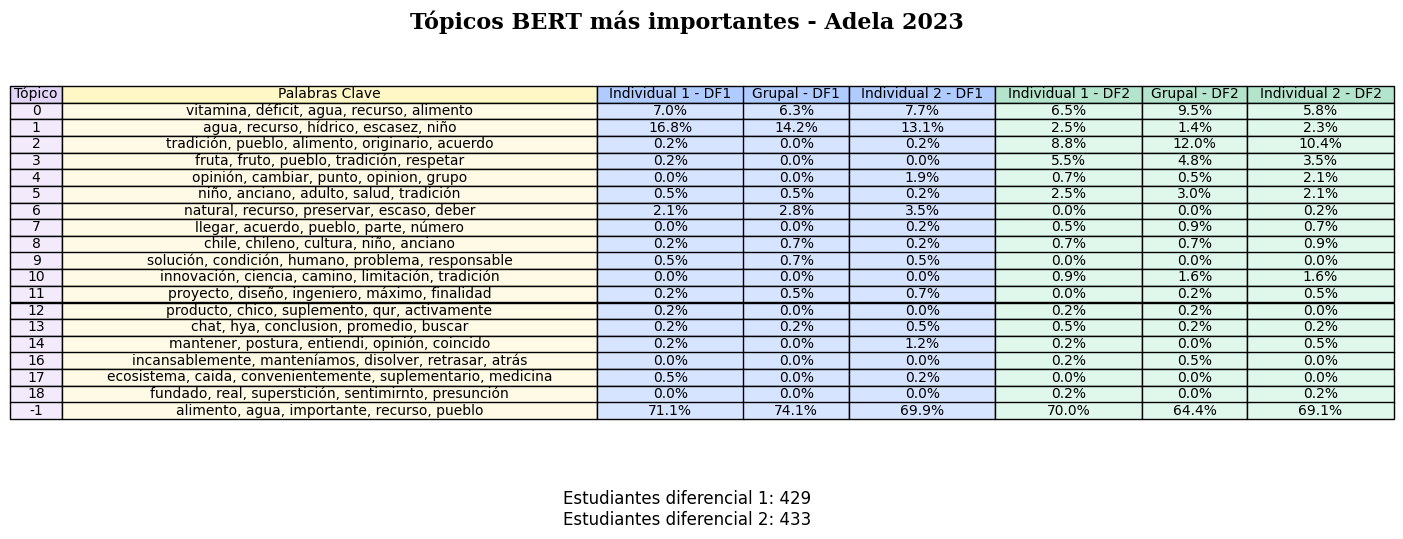

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

def generar_tabla_topicos(topic_counts_ind1_dif1, topic_counts_grup_dif1, topic_counts_ind2_dif1,
                          topic_counts_ind1_dif2, topic_counts_grup_dif2, topic_counts_ind2_dif2,
                          bert_alumnos_d1, bert_alumnos_d2, model, resultados_csv):
    
    # Unión de todos los tópicos
    all_topics = set(topic_counts_ind1_dif1.keys()).union(
        topic_counts_grup_dif1.keys(), topic_counts_ind2_dif1.keys(),
        topic_counts_ind1_dif2.keys(), topic_counts_grup_dif2.keys(), topic_counts_ind2_dif2.keys()
    )
    
    # Construcción de la tabla
    data = []
    for topic in all_topics:
        try:
            palabras_clave = ", ".join([w[0] for w in model.get_topic(topic)[:5]])
        except:
            palabras_clave = f"Tópico {topic} no encontrado"
        
        # Cálculo de porcentajes para Diferencial 1
        ind1_df1_count = topic_counts_ind1_dif1.get(topic, 0)
        grup_df1_count = topic_counts_grup_dif1.get(topic, 0)
        ind2_df1_count = topic_counts_ind2_dif1.get(topic, 0)
        
        ind1_df1_pct = (ind1_df1_count * 100 / bert_alumnos_d1) if bert_alumnos_d1 > 0 else 0
        grup_df1_pct = (grup_df1_count * 100 / bert_alumnos_d1) if bert_alumnos_d1 > 0 else 0
        ind2_df1_pct = (ind2_df1_count * 100 / bert_alumnos_d1) if bert_alumnos_d1 > 0 else 0
        
        # Cálculo de porcentajes para Diferencial 2
        ind1_df2_count = topic_counts_ind1_dif2.get(topic, 0)
        grup_df2_count = topic_counts_grup_dif2.get(topic, 0)
        ind2_df2_count = topic_counts_ind2_dif2.get(topic, 0)
        
        ind1_df2_pct = (ind1_df2_count * 100 / bert_alumnos_d2) if bert_alumnos_d2 > 0 else 0
        grup_df2_pct = (grup_df2_count * 100 / bert_alumnos_d2) if bert_alumnos_d2 > 0 else 0
        ind2_df2_pct = (ind2_df2_count * 100 / bert_alumnos_d2) if bert_alumnos_d2 > 0 else 0
        
        # Agregar a la tabla
        data.append([
            topic, palabras_clave, 
            f"{ind1_df1_pct:.1f}%", f"{grup_df1_pct:.1f}%", f"{ind2_df1_pct:.1f}%",
            f"{ind1_df2_pct:.1f}%", f"{grup_df2_pct:.1f}%", f"{ind2_df2_pct:.1f}%"
        ])
    
    # Crear DataFrame
    df = pd.DataFrame(data, columns=[
        "Tópico", "Palabras Clave", 
        "Individual 1 - DF1", "Grupal - DF1", "Individual 2 - DF1",
        "Individual 1 - DF2", "Grupal - DF2", "Individual 2 - DF2"
    ])
    
    # Guardar como CSV
    output_path = f"{resultados_csv}/BERT_TOPICS_TABLE.csv"
    df.to_csv(output_path, index=False, encoding="utf-8-sig")
    
    print(f"Tabla generada exitosamente y guardada en: {output_path}")
    
    # Colores pastel
    color_mapping = {
        "Individual 1 - DF1": "#AFCBFF", "Grupal - DF1": "#AFCBFF", "Individual 2 - DF1": "#AFCBFF",
        "Individual 1 - DF2": "#B4E4CB", "Grupal - DF2": "#B4E4CB", "Individual 2 - DF2": "#B4E4CB",
        "Tópico": "#E3D5F8", "Palabras Clave": "#FFF7C5"
    }
    row_colors = {
        "Individual 1 - DF1": "#D6E4FF", "Grupal - DF1": "#D6E4FF", "Individual 2 - DF1": "#D6E4FF",
        "Individual 1 - DF2": "#DFF8EB", "Grupal - DF2": "#DFF8EB", "Individual 2 - DF2": "#DFF8EB",
        "Tópico": "#F3EBFC", "Palabras Clave": "#FFFAE5"
    }
    
    # Guardar la tabla como imagen
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.axis('tight')
    ax.axis('off')
    
    # Crear tabla visual
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))
    
    # Aplicar colores a las columnas
    for col_idx, col_name in enumerate(df.columns):
        table[0, col_idx].set_facecolor(color_mapping.get(col_name, "white"))  # Encabezados
        for row_idx in range(1, len(df) + 1):
            table[row_idx, col_idx].set_facecolor(row_colors.get(col_name, "white"))  # Filas
    
    # Guardar imagen
    image_path = f"../resultados/{caso}/BERT_TOPICS_TABLE.png"
    plt.suptitle(f"Tópicos BERT más importantes - {caso}", fontsize=16, fontweight='bold', fontfamily='serif')
    plt.figtext(0.5, -0.05, f'Estudiantes diferencial 1: {bert_alumnos_d1}\nEstudiantes diferencial 2: {bert_alumnos_d2}', 
                ha='center', fontsize=12)
    plt.savefig(image_path, bbox_inches='tight', dpi=300)
    print(f"Tabla guardada como imagen en: {image_path}")
    
    return df

resultados_csv = f"../processed_data/{caso}"
tabla = generar_tabla_topicos(
    topic_counts_ind1_dif1, topic_counts_grup_dif1, topic_counts_ind2_dif1,
    topic_counts_ind1_dif2, topic_counts_grup_dif2, topic_counts_ind2_dif2,
    bert_alumnos_d1, bert_alumnos_d2, model, resultados_csv
)

## Análisis de Tópicos Éticos

In [5]:
import spacy
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Diccionario de tópicos éticos

In [10]:
keywords_dict = {
    "discriminación": [
        "exclusión",
        "inequidad",
        "sesgo",
        "injusticia",
        "prejuicio",
        "marginación",
        "desigualdad",
        "diversidad",
        "equidad",
        "estigmatización"
    ],
    "justicia": [
        "equidad",
        "imparcialidad",
        "derechos",
        "legalidad",
        "reparación",
        "necesidad",
        "deber",
        "responsabilidad",
        "honor",
        "consenso"
    ],
    "igualdad": [
        "equidad",
        "justicia",
        "inclusión",
        "derechos",
        "equilibrio",
        "paridad",
        "simetría",
        "respeto",
        "diversidad",
        "acceso"
    ],
    "salud": [
        "bienestar",
        "prevención",
        "cuidado",
        "atención",
        "sanidad",
        "nutrición",
        "ejercicio",
        "enfermedad",
        "rehabilitación",
        "calidad"
    ],
    "transparencia": [
        "claridad",
        "honestidad",
        "acceso",
        "información",
        "integridad",
        "responsabilidad",
        "confianza",
        "divulgación",
        "visibilidad",
        "rendición"
    ],
    "responsabilidad": [
        "deber",
        "obligación",
        "compromiso",
        "rendición",
        "ética",
        "lealtad",
        "confianza",
        "honestidad",
        "seriedad",
        "justicia"
    ],
    "derecho": [
        "ley",
        "justicia",
        "libertad",
        "igualdad",
        "protección",
        "responsabilidad",
        "derechos humanos",
        "equidad",
        "defensa",
        "legislación"
    ],
    "compromiso": [
        "dedicación",
        "lealtad",
        "responsabilidad",
        "promesa",
        "seriedad",
        "altruismo",
        "confianza",
        "honor",
        "solidaridad",
        "esfuerzo"
    ],
    "privacidad": [
        "confidencialidad",
        "protección",
        "seguridad",
        "datos",
        "control",
        "información",
        "anonymidad",
        "secreto",
        "derechos",
        "libertad"
    ],
    "seguridad": [
        "protección",
        "prevención",
        "confianza",
        "integridad",
        "estabilidad",
        "defensa",
        "resiliencia",
        "alerta",
        "evaluación",
        "cuidado"
    ],
    "migracion": [
        "movimiento",
        "asilo",
        "refugiado",
        "transición",
        "integración",
        "diversidad",
        "cultura",
        "identidad",
        "derechos",
        "nueva vida"
    ],
    "consideracion": [
        "respeto",
        "atención",
        "cuidado",
        "evaluación",
        "empatía",
        "comprensión",
        "pensamiento",
        "reflexión",
        "sopesar",
        "valoración"
    ],
    "accesibilidad": [
        "facilidad",
        "igualdad",
        "oportunidad",
        "inclusión",
        "derechos",
        "adaptación",
        "navegabilidad",
        "atención",
        "recursos",
        "participación"
    ],
    "sesgo": [
        "prejuicio",
        "tendencia",
        "influencia",
        "discriminación",
        "desviación",
        "subjetividad",
        "preferencia",
        "injusticia",
        "parcialidad",
        "opinión"
    ],
    "credibilidad": [
        "confianza",
        "validez",
        "fiabilidad",
        "autenticidad",
        "integridad",
        "reputación",
        "veracidad",
        "seriedad",
        "prestigio",
        "honor"
    ],
    "solidaridad": [
        "apoyo",
        "unión",
        "cooperación",
        "compasión",
        "empatía",
        "compromiso",
        "ayuda",
        "hermandad",
        "asistencia",
        "defensa"
    ],
    "social": [
        "comunidad",
        "interacción",
        "relaciones",
        "cultura",
        "participación",
        "organización",
        "cohesión",
        "solidaridad",
        "justicia",
        "equidad"
    ],
    "etica": [
        "moral",
        "valores",
        "responsabilidad",
        "integridad",
        "justicia",
        "principios",
        "honestidad",
        "conducta",
        "deber",
        "normas"
    ],
    "consentimiento": [
        "acuerdo",
        "permiso",
        "autonomía",
        "voluntad",
        "información",
        "libertad",
        "elección",
        "participación",
        "responsabilidad",
        "aceptación"
    ],
    "vulnerabilidad": [
        "fragilidad",
        "riesgo",
        "exposición",
        "desprotección",
        "necesidad",
        "apoyo",
        "sensibilidad",
        "desigualdad",
        "discapacidad",
        "marginación"
    ],
    "integridad": [
        "honestidad",
        "coherencia",
        "ética",
        "valores",
        "responsabilidad",
        "rectitud",
        "transparencia",
        "fiabilidad",
        "moralidad",
        "solidaridad"
    ],
    "inclusion": [
        "diversidad",
        "acceso",
        "participación",
        "igualdad",
        "respeto",
        "aceptación",
        "justicia",
        "equidad",
        "cohesión",
        "solidaridad"
    ],
    "respeto": [
        "consideración",
        "dignidad",
        "valorización",
        "honor",
        "cuidado",
        "aprecio",
        "tolerancia",
        "aceptación",
        "solidaridad",
        "responsabilidad"
    ],
    "precaucion": [
        "cuidado",
        "prevención",
        "evaluación",
        "consideración",
        "riesgo",
        "seguridad",
        "atención",
        "planificación",
        "responsabilidad",
        "conservación"
    ]
}

In [11]:
# Lematizar el diccionario de palabras clave
nlp = spacy.load("es_core_news_md") 

ethic_topics_keywords = {}

tokenizer = StemmerTokenizer(stem=True) 
for key, values in keywords_dict.items():
    lematizado_key = key  
    lematizado_values = [tokenizer(value)[0] for value in values]  
    ethic_topics_keywords[lematizado_key] = lematizado_values

### Predecir tópicos éticos

In [27]:
def ethic_palabras_clave_en_comentario(comentario):
    ponderaciones = {}
    doc = nlp(comentario.lower())
    
    for token in doc:
        if token.is_alpha and token.text not in stop_words_custom:
            for key, values in keywords_dict.items():
                # Verifica coincidencia directa de la lematización
                if token.lemma_ in values:
                    ponderaciones[key] = ponderaciones.get(key, 0) + 1

    # Si no hay coincidencias, agrega "Sin tópico"
    if not ponderaciones:
        ponderaciones["Sin tópico"] = 1

    return ponderaciones

def predecir_topicos_eticos(comentario):
    ponderaciones = ethic_palabras_clave_en_comentario(comentario)
    return [topic for topic, peso in ponderaciones.items() if peso > 0]  

def predict_ethic_topic(df1, df2, caso):
    df1['ETHIC_topicos_ind1'] = ""
    df1['ETHIC_topicos_ind2'] = ""

    df2['ETHIC_topicos_ind1'] = ""
    df2['ETHIC_topicos_ind2'] = ""

    if 'ETHIC_topicos_grup' in df1.columns:
        df1 = df1.drop(columns=['ETHIC_topicos_grup'])
    if 'ETHIC_topicos_grup' in df2.columns:
        df2 = df2.drop(columns=['ETHIC_topicos_grup'])

    # Definir una función para predecir tópicos de grupos
    def predecir_topicos_grup(df, group_cols, comment_col):
        grouped = df[group_cols + [comment_col]].drop_duplicates(subset=group_cols)
        grouped['ETHIC_topicos_grup'] = grouped[comment_col].apply(lambda x: predecir_topicos_eticos(str(x)))
        df = df.merge(grouped[group_cols + ['ETHIC_topicos_grup']], on=group_cols, how='left')
        return df

    # Topicos grupales
    df1 = predecir_topicos_grup(df1, ['Grup', 'seccion', 'agno'], 'Comentario - Grup - Diferencial 1')
    df2 = predecir_topicos_grup(df2, ['Grup', 'seccion', 'agno'], 'Comentario - Grup - Diferencial 2')

    # Topicos para Ind1 e Ind2
    for i, comentario in df1['Comentario - Ind1 - Diferencial 1'].items():
        topicos = predecir_topicos_eticos(comentario)
        df1.at[i, 'ETHIC_topicos_ind1'] = topicos

    for i, comentario in df1['Comentario - Ind2 - Diferencial 1'].items():
        topicos = predecir_topicos_eticos(comentario)
        df1.at[i, 'ETHIC_topicos_ind2'] = topicos

    for i, comentario in df2['Comentario - Ind1 - Diferencial 2'].items():
        topicos = predecir_topicos_eticos(comentario)
        df2.at[i, 'ETHIC_topicos_ind1'] = topicos

    for i, comentario in df2['Comentario - Ind2 - Diferencial 2'].items():
        topicos = predecir_topicos_eticos(comentario)
        df2.at[i, 'ETHIC_topicos_ind2'] = topicos

    # Guardar topicos predichos
    df1.to_csv(f"../processed_data/{caso}/ETHIC_Topics_df1.csv", index=False)
    df2.to_csv(f"../processed_data/{caso}/ETHIC_Topics_df2.csv", index=False)

In [28]:
predict_ethic_topic(df_df1, df_df2, caso)

### Gráficos

In [12]:
# === Graficar === #
def procesar_y_graficar_topicos(caso, differential):
    # Font sizes
    title_font = 25
    label_font = 20
    bar_font = 10
    ticks_font = 18
    legend_font = 18
    text_font = 18

    # Leer dataframes
    df = pd.read_csv(f"../processed_data/{caso}/ETHIC_Topics_df{differential}.csv")
    total_alumnos = len(df)

    # Aplicar estilo de Seaborn
    sns.set(style="whitegrid")
    
    # Extraer y contar tópicos para cada etapa y diferencial
    # Expandir las listas en las columnas y convertir a minúsculas
    expanded_topics_ind1 = df['ETHIC_topicos_ind1'].apply(lambda x: eval(x) if isinstance(x, str) else x).explode().str.lower()
    expanded_topics_grup = df['ETHIC_topicos_grup'].apply(lambda x: eval(x) if isinstance(x, str) else x).explode().str.lower()
    expanded_topics_ind2 = df['ETHIC_topicos_ind2'].apply(lambda x: eval(x) if isinstance(x, str) else x).explode().str.lower()

    # Contar las ocurrencias de cada tópico
    topic_counts_ind1 = expanded_topics_ind1.value_counts().reset_index()
    topic_counts_grup = expanded_topics_grup.value_counts().reset_index()
    topic_counts_ind2 = expanded_topics_ind2.value_counts().reset_index()
    
    # Renombrar las columnas
    topic_counts_ind1.columns = ['Tópico', 'Frecuencia']
    topic_counts_grup.columns = ['Tópico', 'Frecuencia']
    topic_counts_ind2.columns = ['Tópico', 'Frecuencia']
    
    # Unir todos los conteos en un solo DataFrame
    all_counts = pd.merge(topic_counts_ind1, topic_counts_grup, on='Tópico', how='outer', suffixes=('_ind1', '_grup'))
    all_counts = pd.merge(all_counts, topic_counts_ind2, on='Tópico', how='outer')
    all_counts.columns = ['Tópico', 'Frecuencia_Ind1', 'Frecuencia_Grup', 'Frecuencia_Ind2']
    
    # Reemplazar NaN por 0
    all_counts.fillna(0, inplace=True)

    # Preparar las frecuencias totales
    all_counts['Frecuencia_Total'] = all_counts['Frecuencia_Ind1'] + all_counts['Frecuencia_Grup'] + all_counts['Frecuencia_Ind2']
    
    # Obtener los tópicos y frecuencias
    top_words = all_counts['Tópico']
    freqs_ind1 = all_counts['Frecuencia_Ind1']
    freqs_grup = all_counts['Frecuencia_Grup']
    freqs_ind2 = all_counts['Frecuencia_Ind2']

    porcentajes_ind1 = (freqs_ind1 / total_alumnos) * 100
    porcentajes_grup = (freqs_grup / total_alumnos) * 100
    porcentajes_ind2 = (freqs_ind2 / total_alumnos) * 100

    # Posiciones en el eje X
    x = range(len(top_words))
    plt.figure(figsize=(18, 8))  

    # Ajuste de la posición de las barras
    width = 0.3
    bar_ind1 = plt.bar([p - width for p in x], freqs_ind1, width=width, label='Individual 1', color=sns.color_palette("Blues")[2])
    bar_grup = plt.bar(x, freqs_grup, width=width, label='Grupal', color=sns.color_palette("Greens")[2])
    bar_ind2 = plt.bar([p + width for p in x], freqs_ind2, width=width, label='Individual 2', color=sns.color_palette("Oranges")[2])

    # Añadir etiquetas y leyenda
    plt.xlabel('Tópicos (Palabras Clave)', fontsize=label_font)
    plt.ylabel('Frecuencia', fontsize=label_font, ha='center')
    plt.title(f"Caso: {caso} - Frecuencia de tópicos por etapa, Diferencial {differential}", fontsize=title_font, fontfamily='serif', x=0.45)
    plt.xticks(ticks=x, labels=top_words, rotation=90, fontsize=ticks_font)
    plt.yticks(fontsize=ticks_font)
    plt.legend(fontsize=legend_font)

    # Añadir líneas de cuadrícula
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Añadir los textos sobre las barras (frecuencia y porcentaje), con un pequeño ajuste en la posición vertical
    for i, bar in enumerate(bar_ind1):
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # Posición X (centro de la barra)
            bar.get_height() + 5,  # Desplazamos los textos hacia arriba
            f"{porcentajes_ind1[i]:.1f}%",  # Frecuencia y porcentaje
            ha='center', va='bottom', fontsize=bar_font, color='black', rotation=90
        )
    
    for i, bar in enumerate(bar_grup):
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + 5,  # Desplazamos los textos hacia arriba
            f"{porcentajes_grup[i]:.1f}%",  
            ha='center', va='bottom', fontsize=bar_font, color='black', rotation=90
        )
    
    for i, bar in enumerate(bar_ind2):
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + 5,  # Desplazamos los textos hacia arriba
            f"{porcentajes_ind2[i]:.1f}%",  
            ha='center', va='bottom', fontsize=bar_font, color='black', rotation=90
        )

    # Guardar el gráfico
    plt.figtext(0.52, 0.005, f"Total de estudiantes: {total_alumnos}", ha="center", fontsize=text_font)
    plt.subplots_adjust(bottom=0.32)
    plt.savefig(f"../resultados/{caso}/ETHIC_Topics_Dif{differential}.png")
    plt.close()

    # Font sizes
    title_font = 25
    label_font = 18
    bar_font = 14
    ticks_font = 14
    legend_font = 18
    text_font = 18
    
    # Graficar los 10 tópicos más comunes
    topico_frecuencia = all_counts[['Tópico', 'Frecuencia_Total']].sort_values(by='Frecuencia_Total', ascending=False).head(10)

    # Calcular porcentajes
    topico_frecuencia['Porcentaje'] = (topico_frecuencia['Frecuencia_Total'] * 100) / (total_alumnos * 3)

    # si el diferencial es 1, color es azul, si es 2, color es verde
    color_graph = 'lightblue' if differential == 1 else 'lightgreen'

    plt.figure(figsize=(15, 6))
    bars = plt.barh(topico_frecuencia['Tópico'], topico_frecuencia['Frecuencia_Total'], color=color_graph)

    # Añadir etiquetas con los porcentajes al final de las barras
    for i, bar in enumerate(bars):
        plt.text(
            bar.get_width() + 1,  
            bar.get_y() + bar.get_height() / 2, 
            f"{topico_frecuencia['Porcentaje'].iloc[i]:.1f}%", 
            ha='left', va='center', fontsize=bar_font
        )

    plt.barh(topico_frecuencia['Tópico'], topico_frecuencia['Frecuencia_Total'], color=color_graph)
    plt.xlabel('Ocurrencias en comentarios', fontsize=label_font)
    plt.ylabel('Tópico', fontsize=label_font)
    plt.title(f'Caso: {caso} - Tópicos relevantes más comunes, Diferencial {differential}', fontfamily='serif', fontsize=title_font)
    plt.tick_params(axis='x', labelsize=ticks_font) 
    plt.tick_params(axis='y', labelsize=ticks_font)  
    plt.figtext(0.5, 0.01, f'Estudiantes: {total_alumnos} | Total de respuestas: {total_alumnos*3}', ha='center', fontsize=text_font)
    plt.gca().invert_yaxis()  
    plt.subplots_adjust(bottom=0.15)
    plt.savefig(f"../resultados/{caso}/ETHIC_Top10_Topicos_Dif{differential}.png")
    plt.close()

    # Graficar los 10 tópicos menos comunes
    topico_frecuencia_menor = all_counts[['Tópico', 'Frecuencia_Total']].sort_values(by='Frecuencia_Total').head(10)

    # Calcular porcentajes
    topico_frecuencia_menor['Porcentaje'] = (topico_frecuencia_menor['Frecuencia_Total'] * 100) / (total_alumnos * 3)

    plt.figure(figsize=(15, 6))
    bars = plt.barh(topico_frecuencia_menor['Tópico'], topico_frecuencia_menor['Frecuencia_Total'], color=color_graph)

    # Añadir etiquetas con los porcentajes al final de las barras
    for i, bar in enumerate(bars):
        plt.text(
            bar.get_width() + 1,  # Posición X (final de la barra)
            bar.get_y() + bar.get_height() / 2,  # Posición Y (centro de la barra)
            f"{topico_frecuencia_menor['Porcentaje'].iloc[i]:.1f}%",  # Mostrar el porcentaje
            ha='left', va='center', fontsize=bar_font
        )

    plt.barh(topico_frecuencia_menor['Tópico'], topico_frecuencia_menor['Frecuencia_Total'], color=color_graph)
    plt.xlabel('Ocurrencias en comentarios', fontsize=label_font)
    plt.ylabel('Tópico', fontsize=label_font)
    plt.title(f'Caso: {caso} - Tópicos relevantes menos comunes, Diferencial {differential}', fontfamily='serif', fontsize=title_font)
    plt.tick_params(axis='x', labelsize=ticks_font) 
    plt.tick_params(axis='y', labelsize=ticks_font)  
    plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el menos común arriba
    plt.subplots_adjust(bottom=0.15)
    plt.figtext(0.5, 0.01, f'Estudiantes: {total_alumnos} | Total de respuestas: {total_alumnos*3}', ha='center', fontsize=text_font)
    plt.savefig(f"../resultados/{caso}/ETHIC_Top10_Topicos_Menos_Comunes_Dif{differential}.png")
    plt.close()

    # print de todos los nombres de los graficos generados
    print(f"Gráficos generados exitosamente para el diferencial {differential}.")
    print(f"Gráficos generados:\nETHIC_Topics_Dif{differential}.png\nETHIC_Top10_Topicos_Dif{differential}.png\nETHIC_Top10_Topicos_Menos_Comunes_Dif{differential}.png\n")

In [ ]:
procesar_y_graficar_topicos(caso, 1)
procesar_y_graficar_topicos(caso, 2)

## Tópicos distintos entre etapas

In [14]:
import ast

def BERT_contar_topicos_distintos(df, columna):
    # Crear un diccionario para almacenar los resultados
    topicos_distintos = 0
    topicos_distintos += df[columna].nunique()
    
    return topicos_distintos

def ETHIC_contar_topicos_unicos(df, columna):
    columna = df[columna].apply(lambda x: ast.literal_eval(x))
    # Filtrar los tópicos únicos que no sean "Sin tópico"
    all_topicos = [topic for topic_list in columna for topic in topic_list if topic != 'Sin tópico']
    return len(set(all_topicos))

In [15]:
# === Topicos distintos entre etapas === #
def distinct_topics(caso):
    # BERT
    df1_BERT = pd.read_csv(f'../processed_data/{caso}/BERT_df1.csv')
    df2_BERT = pd.read_csv(f'../processed_data/{caso}/BERT_df2.csv')
    # ETHICS
    df1_ETHICS = pd.read_csv(f'../processed_data/{caso}/ETHIC_Topics_df1.csv')
    df2_ETHICS = pd.read_csv(f'../processed_data/{caso}/ETHIC_Topics_df2.csv')

    # Contar tópicos únicos en cada columna: ETHIC_topicos_ind1	ETHIC_topicos_ind2	ETHIC_topicos_grup
    print('Realizando conteo de tópicos BERT y ETHIC distintos en cada etapa...')
    # Diferencial 1
    BERT_ind1_df1 = BERT_contar_topicos_distintos(df1_BERT, 'BERT_topicos_ind1')
    BERT_grup_df1 = BERT_contar_topicos_distintos(df1_BERT, 'BERT_topicos_grup')
    BERT_ind2_df1 = BERT_contar_topicos_distintos(df1_BERT, 'BERT_topicos_ind2')
    # Diferencial 2
    BERT_ind1_df2 = BERT_contar_topicos_distintos(df2_BERT, 'BERT_topicos_ind1')
    BERT_grup_df2 = BERT_contar_topicos_distintos(df2_BERT, 'BERT_topicos_grup')
    BERT_ind2_df2 = BERT_contar_topicos_distintos(df2_BERT, 'BERT_topicos_ind2')

    # Diferencial 1
    ETHIC_ind1_df1 = ETHIC_contar_topicos_unicos(df1_ETHICS, 'ETHIC_topicos_ind1')
    ETHIC_grup_df1 = ETHIC_contar_topicos_unicos(df1_ETHICS, 'ETHIC_topicos_grup')
    ETHIC_ind2_df1 = ETHIC_contar_topicos_unicos(df1_ETHICS, 'ETHIC_topicos_ind2')
    # Diferencial 2
    ETHIC_ind1_df2 = ETHIC_contar_topicos_unicos(df2_ETHICS, 'ETHIC_topicos_ind1')
    ETHIC_grup_df2 = ETHIC_contar_topicos_unicos(df2_ETHICS, 'ETHIC_topicos_grup')
    ETHIC_ind2_df2 = ETHIC_contar_topicos_unicos(df2_ETHICS, 'ETHIC_topicos_ind2')

    print("Conteo finalizado")
    # Total de topicos distintos
    # BERT
    total_topicos_BERT = len(set(
        df1_BERT['BERT_topicos_ind1'].tolist() +
        df1_BERT['BERT_topicos_grup'].tolist() +
        df1_BERT['BERT_topicos_ind2'].tolist() +
        df2_BERT['BERT_topicos_ind1'].tolist() +
        df2_BERT['BERT_topicos_grup'].tolist() +
        df2_BERT['BERT_topicos_ind2'].tolist()
    ))

    # ETHIC
    total_topicos_ETHIC = len(set(
        [topic for topic_list in df1_ETHICS['ETHIC_topicos_ind1'].apply(ast.literal_eval) for topic in topic_list if topic != 'Sin tópico'] +
        [topic for topic_list in df1_ETHICS['ETHIC_topicos_grup'].apply(ast.literal_eval) for topic in topic_list if topic != 'Sin tópico'] +
        [topic for topic_list in df1_ETHICS['ETHIC_topicos_ind2'].apply(ast.literal_eval) for topic in topic_list if topic != 'Sin tópico'] +
        [topic for topic_list in df2_ETHICS['ETHIC_topicos_ind1'].apply(ast.literal_eval) for topic in topic_list if topic != 'Sin tópico'] +
        [topic for topic_list in df2_ETHICS['ETHIC_topicos_grup'].apply(ast.literal_eval) for topic in topic_list if topic != 'Sin tópico'] +
        [topic for topic_list in df2_ETHICS['ETHIC_topicos_ind2'].apply(ast.literal_eval) for topic in topic_list if topic != 'Sin tópico']
    ))

    # Porcentajes
    # Calcular porcentajes para BERT
    BERT_percentages_df1 = [
        (BERT_ind1_df1 * 100 / total_topicos_BERT),
        (BERT_grup_df1 * 100 / total_topicos_BERT),
        (BERT_ind2_df1 * 100 / total_topicos_BERT),
    ]
    BERT_percentages_df2 = [
        (BERT_ind1_df2 * 100 / total_topicos_BERT),
        (BERT_grup_df2 * 100 / total_topicos_BERT),
        (BERT_ind2_df2 * 100 / total_topicos_BERT),
    ]

    # Calcular porcentajes para ETHIC
    ETHIC_percentages_df1 = [
        (ETHIC_ind1_df1 * 100 / total_topicos_ETHIC),
        (ETHIC_grup_df1 * 100 / total_topicos_ETHIC),
        (ETHIC_ind2_df1 * 100 / total_topicos_ETHIC),
    ]
    ETHIC_percentages_df2 = [
        (ETHIC_ind1_df2 * 100 / total_topicos_ETHIC),
        (ETHIC_grup_df2 * 100 / total_topicos_ETHIC),
        (ETHIC_ind2_df2 * 100 / total_topicos_ETHIC),
    ]

    # Font sizes
    title_font = 20
    label_font = 18
    bar_font = 16
    ticks_font = 16
    legend_font = 18
    text_font = 20

    print("Generación de gráficos...")  
    # Grafico 1, topicos distintos por etapa para BERT
    # Diferencial 1
    color_graphd1 = 'lightblue'
    plt.figure(figsize=(12, 6))
    bars = plt.bar(['Ind1', 'Grup', 'Ind2'], [BERT_ind1_df1, BERT_grup_df1, BERT_ind2_df1], color=color_graphd1)
    plt.bar(['Ind1', 'Grup', 'Ind2'], [BERT_ind1_df1, BERT_grup_df1, BERT_ind2_df1], color=color_graphd1)
    plt.title(f"Caso: {caso} - Tópicos BERT distintos por etapa, Diferencial 1", fontsize=title_font, fontfamily='serif')
    plt.xlabel('Etapa', fontsize=label_font)
    plt.ylabel('Tópicos Distintos', fontsize=label_font)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tick_params(axis='x', labelsize=ticks_font)  
    plt.tick_params(axis='y', labelsize=ticks_font)

    # Agregar porcentajes sobre las barras
    for bar, percentage in zip(bars, BERT_percentages_df1):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{percentage:.1f}%', ha='center', fontsize=bar_font)
   
    #plt.tight_layout()
    plt.figtext(0.5, 0.02, f'Total de tópicos distintos: {total_topicos_BERT}', ha='center', fontsize=text_font)
    plt.subplots_adjust(bottom=0.2)
    plt.savefig(f'../resultados/{caso}/BERT_Distinct_Topics_D1.png')
    plt.close()

    # Diferencial 2
    color_graphd2 = 'lightgreen'
    plt.figure(figsize=(12, 6))
    bars = plt.bar(['Ind1', 'Grup', 'Ind2'], [BERT_ind1_df2, BERT_grup_df2, BERT_ind2_df2], color=color_graphd2)
    plt.bar(['Ind1', 'Grup', 'Ind2'], [BERT_ind1_df2, BERT_grup_df2, BERT_ind2_df2], color=color_graphd2)
    plt.title(f"Caso: {caso} - Tópicos BERT distintos por etapa, Diferencial 2", fontsize=title_font, fontfamily='serif')
    plt.xlabel('Etapa', fontsize=label_font)
    plt.ylabel('Tópicos Distintos', fontsize=label_font)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tick_params(axis='x', labelsize=ticks_font)  
    plt.tick_params(axis='y', labelsize=ticks_font)

    # Agregar porcentajes sobre las barras
    for bar, percentage in zip(bars, BERT_percentages_df2):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{percentage:.1f}%', ha='center', fontsize=bar_font)
    
    #plt.tight_layout()
    plt.figtext(0.5, 0.02, f'Total de tópicos distintos: {total_topicos_BERT}', ha='center', fontsize=text_font)
    plt.subplots_adjust(bottom=0.2)
    plt.savefig(f'../resultados/{caso}/BERT_Distinct_Topics_D2.png')
    plt.close()


    # Grafico 2, topicos distintos por etapa para ETHIC 
    # Diferencial 1
    plt.figure(figsize=(12, 6))
    bars = plt.bar(['Ind1', 'Grup', 'Ind2'], [ETHIC_ind1_df1, ETHIC_grup_df1, ETHIC_ind2_df1], color=color_graphd1)
    plt.bar(['Ind1', 'Grup', 'Ind2'], [ETHIC_ind1_df1, ETHIC_grup_df1, ETHIC_ind2_df1], color=color_graphd1)
    plt.title(f"Caso: {caso} - Tópicos éticos distintos por etapa, Diferencial 1", fontsize=title_font, fontfamily='serif')
    plt.xlabel('Etapa', fontsize=label_font)
    plt.ylabel('Tópicos Distintos', fontsize=label_font)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tick_params(axis='x', labelsize=ticks_font)  
    plt.tick_params(axis='y', labelsize=ticks_font)

    for bar, percentage in zip(bars, ETHIC_percentages_df1):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{percentage:.1f}%', ha='center', fontsize=bar_font)
    
    
    plt.figtext(0.5, 0.02, f'Total de tópicos distintos: {total_topicos_ETHIC}', ha='center', fontsize=text_font)
    plt.subplots_adjust(bottom=0.2)
    plt.savefig(f'../resultados/{caso}/ETHIC_Distinct_Topics_D1.png')
    plt.close()

    # Diferencial 2
    plt.figure(figsize=(12, 6))
    bars = plt.bar(['Ind1', 'Grup', 'Ind2'], [ETHIC_ind1_df2, ETHIC_grup_df2, ETHIC_ind2_df2], color=color_graphd2)
    plt.bar(['Ind1', 'Grup', 'Ind2'], [ETHIC_ind1_df2, ETHIC_grup_df2, ETHIC_ind2_df2], color=color_graphd2)
    plt.title(f"Caso: {caso} - Tópicos éticos distintos por etapa, Diferencial 2", fontsize=title_font, fontfamily='serif')
    plt.xlabel('Etapa', fontsize=label_font)
    plt.ylabel('Tópicos Distintos', fontsize=label_font)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tick_params(axis='x', labelsize=ticks_font)  
    plt.tick_params(axis='y', labelsize=ticks_font)

    for bar, percentage in zip(bars, ETHIC_percentages_df2):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{percentage:.1f}%', ha='center', fontsize=text_font)
    
    #plt.tight_layout()
    plt.figtext(0.5, 0.02, f'Total de tópicos distintos: {total_topicos_ETHIC}', ha='center', fontsize=text_font)
    plt.subplots_adjust(bottom=0.2)
    plt.savefig(f'../resultados/{caso}/ETHIC_Distinct_Topics_D2.png')
    plt.close()

    print("Gráficos generados")
    # print de todos los graficos generados (nombres)
    print(f"Gráficos generados: \nBERT_Distinct_Topics_D1.png\nBERT_Distinct_Topics_D2.png\nETHIC_Distinct_Topics_D1.png\nETHIC_Distinct_Topics_D2.png")

In [ ]:
distinct_topics(caso)

## Comparación de tópicos éticos entre etapas

### Código

In [17]:
def ethic_topics_between_stages(caso):
    print("=== Comparación de Tópicos Éticos entre Etapas ===")
    df1 = pd.read_csv(f"../processed_data/{caso}/ETHIC_Topics_df1.csv")
    df2 = pd.read_csv(f"../processed_data/{caso}/ETHIC_Topics_df2.csv")
    print("Generando gráfico...")
    # Contar tópicos en Ind1 e Ind2 para df1
    df1['len_ETHIC_topicos_ind1'] = df1['ETHIC_topicos_ind1'].apply(len)
    df1['len_ETHIC_topicos_ind2'] = df1['ETHIC_topicos_ind2'].apply(len)
    df1['topicos_ind2_mayor'] = df1['len_ETHIC_topicos_ind2'] > df1['len_ETHIC_topicos_ind1']
    DF1 = df1['topicos_ind2_mayor'].sum()

    # Contar tópicos en Ind1 e Ind2 para df2
    df2['len_ETHIC_topicos_ind1'] = df2['ETHIC_topicos_ind1'].apply(len)
    df2['len_ETHIC_topicos_ind2'] = df2['ETHIC_topicos_ind2'].apply(len)
    df2['topicos_ind2_mayor'] = df2['len_ETHIC_topicos_ind2'] > df2['len_ETHIC_topicos_ind1']
    DF2 = df2['topicos_ind2_mayor'].sum()

    # Datos para el gráfico
    data = {
        'Diferencial': ['Diferencial 1', 'Diferencial 2'],
        'Frecuencia': [DF1, DF2]
    }
    df_plot = pd.DataFrame(data)

    # Total estudiantes df1 y df2
    total_alumnos1 = len(df1)
    total_alumnos2 = len(df2)

    # Font sizes
    title_font = 15
    label_font = 15
    bar_font = 14
    ticks_font = 14
    legend_font = 10
    text_font = 15

    # Crear el gráfico
    plt.figure(figsize=(10, 8))
    barplot = sns.barplot(
        x='Diferencial', 
        y='Frecuencia', 
        data=df_plot, 
        hue='Diferencial', 
        palette={'Diferencial 1': 'lightblue', 'Diferencial 2': 'lightgreen'},
        dodge=False
    )

    # Añadir valores en las barras
    totals = [total_alumnos1, total_alumnos2]  # Totales de estudiantes para cada diferencial
    for p, total in zip(barplot.patches, totals):
        percentage = 100 * p.get_height() / total  # Calcular el porcentaje
        barplot.annotate(
            f'{percentage:.1f}%',  # Mostrar el porcentaje con un decimal
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='center', 
            fontsize=bar_font, 
            color='black', 
            xytext=(0, 10), 
            textcoords='offset points'
        )

    # Personalizar el gráfico
    plt.title(f"Caso: {caso}\nEstudiantes con más tópicos éticos en la etapa individual 2\nque en la individual 1, por diferencial", 
              fontsize=title_font, fontfamily='serif')
    plt.xlabel("Diferencial", fontsize=label_font, labelpad=10)
    plt.ylabel("Número de estudiantes", fontsize=label_font, labelpad=10)
    plt.xticks(fontsize=ticks_font)
    plt.yticks(fontsize=ticks_font)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.figtext(0.5, 0.005, 
                f"Total de estudiantes diferencial 1: {total_alumnos1} | Total de estudiantes diferencial 2: {total_alumnos2}", 
                ha="center", fontsize=text_font, color='black')
    
    # Guardar gráfico
    #plt.tight_layout()
    plt.savefig(f"../resultados/{caso}/ETHIC_Topicos_Ind2_Mayor_Ind1.png", dpi=300)
    plt.close()
    print("Gráfico generado exitosamente.")
    # print de todos los graficos generados (nombres)
    print("Gráfico generado: \nETHIC_Topicos_Ind2_Mayor_Ind1.png")

In [18]:
def ethic_topics_dependency_between_stages(caso):
    print("=== Dependencia de Tópicos Éticos entre Etapas ===")
    df1 = pd.read_csv(f"../processed_data/{caso}/ETHIC_Topics_df1.csv")
    df2 = pd.read_csv(f"../processed_data/{caso}/ETHIC_Topics_df2.csv")
    print("Generando gráfico...")

    # Asegurarse de que las columnas relevantes son listas
    df1['ETHIC_topicos_ind1'] = df1['ETHIC_topicos_ind1'].apply(eval)  
    df1['ETHIC_topicos_grup'] = df1['ETHIC_topicos_grup'].apply(eval)
    df1['ETHIC_topicos_ind2'] = df1['ETHIC_topicos_ind2'].apply(eval)

    df2['ETHIC_topicos_ind1'] = df2['ETHIC_topicos_ind1'].apply(eval)
    df2['ETHIC_topicos_grup'] = df2['ETHIC_topicos_grup'].apply(eval)
    df2['ETHIC_topicos_ind2'] = df2['ETHIC_topicos_ind2'].apply(eval)

    # Función para verificar dependencia de tópicos
    def check_dependency(row, ind_col, grup_col, target_col):
        return any(
            topic in row[grup_col] and topic not in row[ind_col] 
            for topic in row[target_col]
        )

    # Dependencia en Diferencial 1
    df1['tiene_topicos_dep'] = df1.apply(
        lambda row: check_dependency(row, 'ETHIC_topicos_ind1', 'ETHIC_topicos_grup', 'ETHIC_topicos_ind2'), 
        axis=1
    )
    DF1_dependency_count = df1['tiene_topicos_dep'].sum()

    # Dependencia en Diferencial 2
    df2['tiene_topicos_dep'] = df2.apply(
        lambda row: check_dependency(row, 'ETHIC_topicos_ind1', 'ETHIC_topicos_grup', 'ETHIC_topicos_ind2'), 
        axis=1
    )
    DF2_dependency_count = df2['tiene_topicos_dep'].sum()

    # Totales de estudiantes
    total_alumnos1 = len(df1)
    total_alumnos2 = len(df2)

    # Datos para el gráfico
    data = {
        'Diferencial': ['Diferencial 1', 'Diferencial 2'],
        'Número de estudiantes': [DF1_dependency_count, DF2_dependency_count],
    }
    df_plot = pd.DataFrame(data)

    # Font sizes
    title_font = 15
    label_font = 15
    bar_font = 14
    ticks_font = 14
    legend_font = 10
    text_font = 15

    # Crear el gráfico
    plt.figure(figsize=(10, 8))
    barplot = sns.barplot(
        x='Diferencial', 
        y='Número de estudiantes', 
        data=df_plot, 
        hue='Diferencial',  
        palette={'Diferencial 1': 'lightblue', 'Diferencial 2': 'lightgreen'},
        dodge=False
    )

    # Añadir valores en las barras (en porcentaje)
    totals = [total_alumnos1, total_alumnos2]       # Totales de estudiantes
    for p, total in zip(barplot.patches, totals):
        percentage = 100 * p.get_height() / total   # Calcular porcentaje
        barplot.annotate(
            f'{percentage:.1f}%',  # Formato porcentaje
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='center', 
            fontsize=bar_font, 
            color='black', 
            xytext=(0, 10), 
            textcoords='offset points'
        )

    # Personalizar el gráfico
    plt.title(
        f"Caso: {caso}\nEstudiantes que añadieron nuevos tópicos éticos\nen la etapa individual 2 a partir de la grupal", 
        fontsize=title_font, fontfamily='serif')
    plt.xlabel("Diferencial", fontsize=label_font, labelpad=10)
    plt.ylabel("Número de estudiantes", fontsize=label_font, labelpad=10)
    plt.xticks(fontsize=ticks_font)
    plt.yticks(fontsize=ticks_font)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir texto descriptivo
    plt.figtext(
        0.5, 0.005, 
        f"Total de estudiantes diferencial 1: {total_alumnos1} | Total de estudiantes diferencial 2: {total_alumnos2}.", 
        ha="center", fontsize=text_font, color='black'
    )
    # \nEste ánalisis representa topicos por estudiante encontrados en la etapa individual 2 y grupal, 
    # que no estaban previamente en la etapa individual 1, es decir,\n tópicos nuevos luego de comentar entre pares.
    #plt.subplots_adjust(bottom=0.2)

    # Guardar gráfico
    plt.savefig(f"../resultados/{caso}/ETHIC_Topicos_Dependencia_Ind2_no_Ind1_Grup.png")
    plt.close()
    print("Gráfico generado exitosamente.")
    # print de todos los graficos generados (nombres)
    print("Gráfico generado: \nETHIC_Topicos_Dependencia_Ind2_no_Ind1_Grup.png")


### Gráficos

In [ ]:
ethic_topics_between_stages(caso)

In [ ]:
ethic_topics_dependency_between_stages(caso)

## Nube de palabras

### Código

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np

def procesar_comentarios(comentarios, tokenizer):
    texto = ' '.join(comentarios.dropna())  
    tokens = tokenizer(texto)  
    return ' '.join(tokens)  

def generar_nube_palabras(caso, texto, titulo, colormap='viridis', background_color='white', max_words=200, mask=None, stop_words_custom=None):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color=background_color,
        colormap=colormap,  
        max_words=max_words,
        contour_color='steelblue',  
        contour_width=1,
        mask=mask, 
        stopwords=STOPWORDS.union(stop_words_custom if stop_words_custom else set()) 
    ).generate(texto)
    
    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=16, color='darkblue', fontfamily='serif')
    plt.tight_layout(pad=0)
    plt.savefig(f"../resultados/{caso}/WC_{titulo}.png", dpi=300)
    plt.close()

# Función principal para generar nubes de palabras
def crear_nubes_palabras(caso, df_diferencial_1, df_diferencial_2, tokenizer, stop_words_custom=None, colormap='plasma', background_color='ivory'):
    # Crear nubes de palabras para Diferencial 1
    for columna in ['Comentario - Ind1 - Diferencial 1', 'Comentario - Grup - Diferencial 1', 'Comentario - Ind2 - Diferencial 1']:
        texto_procesado = procesar_comentarios(df_diferencial_1[columna], tokenizer)
        generar_nube_palabras(caso, texto_procesado, f"Nube de Palabras para {columna}", colormap=colormap, background_color=background_color, stop_words_custom=stop_words_custom)
    # Crear nubes de palabras para Diferencial 2
    for columna in ['Comentario - Ind1 - Diferencial 2', 'Comentario - Grup - Diferencial 2', 'Comentario - Ind2 - Diferencial 2']:
        texto_procesado = procesar_comentarios(df_diferencial_2[columna], tokenizer)
        generar_nube_palabras(caso, texto_procesado, f"Nube de Palabras para caso: {columna}", colormap=colormap, background_color=background_color, stop_words_custom=stop_words_custom)

### Gráficos

In [ ]:
global stop_words_custom
stop_words_custom = cargar_stopwords('../dictionaries/stopwords_es.txt')
tokenizer = StemmerTokenizer(stem=True, lemmatize=True)
crear_nubes_palabras(caso, df_df1, df_df2, tokenizer=tokenizer, stop_words_custom=stop_words_custom)

## Frecuencia de aparición de palabras éticas

### Código

In [271]:
def cargar_y_preprocesar_comentarios(df_dif1, df_dif2, tokenizer):
    columnas_comentarios_dif1 = [
        'Comentario - Ind1 - Diferencial 1',
        'Comentario - Grup - Diferencial 1',
        'Comentario - Ind2 - Diferencial 1'
    ]
    columnas_comentarios_dif2 = [
        'Comentario - Ind1 - Diferencial 2',
        'Comentario - Grup - Diferencial 2',
        'Comentario - Ind2 - Diferencial 2'
    ]
    
    comentarios_dif1 = df_dif1[columnas_comentarios_dif1].fillna('').values.flatten()
    comentarios_dif2 = df_dif2[columnas_comentarios_dif2].fillna('').values.flatten()
    comentarios = pd.concat([pd.Series(comentarios_dif1), pd.Series(comentarios_dif2)], axis=0).values.flatten()
    comentarios = [str(c) for c in comentarios]
    return [' '.join(tokenizer(c)) for c in comentarios]

# Leer las palabras éticas desde un archivo
def read_ethic_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return set(f.read().splitlines())
    
# Contar cuantas palabras éticas hay en los comentarios: cada palabra etica es contabilizada una sola vez por comentario
def contar_palabras_etica(df1, df2, tokenizer):
    palabras_etica = read_ethic_words('../dictionaries/ethic_words.txt')
    comentarios = cargar_y_preprocesar_comentarios(df1, df2, tokenizer)
    palabras_etica = [tokenizer(palabra)[0] for palabra in palabras_etica]
    contador = Counter()
    
    for comentario in comentarios:
        for palabra in comentario.split():
            if palabra in palabras_etica:
                contador[palabra] += 1
                
    palabras, frecuencias = zip(*contador.items())
    total_comentarios = len(comentarios)
    
    # Calcular porcentajes
    porcentajes = [frecuencia * 100 / total_comentarios for frecuencia in frecuencias]
    
    # Crear el DataFrame
    df_frecuencias = pd.DataFrame({
        'Palabra': palabras,
        'Frecuencia': frecuencias,
        'Porcentaje': porcentajes
    })
    
    # Sort dataframe by Frecuencia & Porcentaje
    df_frecuencias.sort_values(by=['Frecuencia', 'Porcentaje'], ascending=[False, False], inplace=True)

    # Guardar el DataFrame
    df_frecuencias.to_csv(f"../processed_data/{caso}/ETHIC_WORDS_freq_{caso}.csv", index=False)

    # Graficar
    total_estudiantes = len(df1) + len(df2)

    # Graficar
    plt.figure(figsize=(50, 30))
    ax = sns.barplot(
        x='Frecuencia',
        y='Palabra',
        data=df_frecuencias,
        palette='viridis'
    )
    plt.title(f"Caso: {caso} - Frecuencia de palabras éticas en comentarios", fontsize=16, fontfamily='serif')
    plt.xlabel('Frecuencia', fontsize=14)
    plt.ylabel('Palabras Éticas', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.figtext(0.75, 0.01, f"Total de estudiantes: {total_estudiantes} | Total de respuestas: {total_comentarios}" , wrap=True, horizontalalignment='center', fontsize=12)

    # Agregar etiquetas
    for i, bar in enumerate(ax.patches):
        # Obtener frecuencia y porcentaje directamente del DataFrame ordenado
        frecuencia = df_frecuencias.iloc[i]['Frecuencia']
        porcentaje = df_frecuencias.iloc[i]['Porcentaje']
        
        plt.text(
            bar.get_width() + 12,  # Ajustar posición horizontal
            bar.get_y() + bar.get_height() / 2,  # Centrar verticalmente
            f"{int(frecuencia)} ({porcentaje:.1f}%)",  # Etiqueta
            ha='left', va='center', fontsize=10, color='black'
        )

    plt.savefig(f"../resultados/{caso}/ETHIC_WORDS_freq_{caso}.png", dpi=300)

    # Graficar TOP 10
    top10 = df_frecuencias.head(10)

    # Font sizes
    # Font sizes (adjusted)
    title_font = 25    # Slightly larger for emphasis
    label_font = 18    # Proportional to title
    bar_font = 14      # A bit smaller for internal annotations
    ticks_font = 14    # Easier to read axes ticks
    legend_font = 22   # Match with labels
    text_font = 19     # General text, slightly smaller than title

    plt.figure(figsize=(10, 8))  # Figure size remains the same

    ax_top10 = sns.barplot(
        x='Frecuencia',
        y='Palabra',
        data=top10,
        palette='viridis'
    )

    plt.title(f"Caso: {caso} - Top 10 palabras éticas", fontfamily='serif', fontsize=title_font)
    plt.xlabel('Frecuencia', fontsize=label_font)
    plt.ylabel('Palabras Éticas', fontsize=label_font)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.tick_params(axis='x', labelsize=ticks_font)  
    plt.tick_params(axis='y', labelsize=ticks_font)
    # Agregar etiquetas para el TOP 10
    for i, bar in enumerate(ax_top10.patches):
        frecuencia = top10.iloc[i]['Frecuencia']
        porcentaje = top10.iloc[i]['Porcentaje']
        plt.text(
            bar.get_width() + 2,  # Posición más ajustada
            bar.get_y() + bar.get_height() / 2,
            f"({porcentaje:.1f}%)",
            ha='left', va='center', color='black', fontsize=bar_font
        )

    plt.figtext(0.52, 0.005, f"Total de estudiantes: {total_estudiantes} | Total de respuestas: {total_comentarios}" , wrap=True, horizontalalignment='center', fontsize=text_font)
    plt.subplots_adjust(bottom=0.12)
    plt.savefig(f"../resultados/{caso}/ETHIC_WORDS_TOP10_{caso}.png", dpi=300)

    return df_frecuencias

### Gráficos

In [272]:
%%capture
global stop_words_custom
stop_words_custom = cargar_stopwords('../dictionaries/stopwords_es.txt')
tokenizer = StemmerTokenizer(stem=True, lemmatize=True)
contar_palabras_etica(df_df1, df_df2, tokenizer=tokenizer)

## Conectores más usados

### Código

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import spacy
import os
from sklearn.feature_extraction.text import TfidfVectorizer

# Cargar el modelo de Spacy en español
nlp = spacy.load("es_core_news_md")

def identificar_conectores(texto):
    """Identifica conectores en el texto dado."""
    doc = nlp(texto)
    conectores_en_texto = [token.text.lower() for token in doc if token.pos_ in ["CCONJ", "SCONJ", "ADP"]]
    return conectores_en_texto

def extract_grammar_connectors(df1, df2, caso):
    # Leer el archivo de datos
    conectores_totales = []

    # Extraer conectores de cada columna
    Ind1_d1 = df1['Comentario - Ind1 - Diferencial 1'].apply(identificar_conectores).tolist()
    Grup_d1 = df1['Comentario - Grup - Diferencial 1'].apply(identificar_conectores).tolist()
    Ind2_d1 = df1['Comentario - Ind2 - Diferencial 1'].apply(identificar_conectores).tolist()

    Ind1_d2 = df2['Comentario - Ind1 - Diferencial 2'].apply(identificar_conectores).tolist()
    Grup_d2 = df2['Comentario - Grup - Diferencial 2'].apply(identificar_conectores).tolist()
    Ind2_d2 = df2['Comentario - Ind2 - Diferencial 2'].apply(identificar_conectores).tolist()

    conectores_totales.extend([conector for sublist in Ind1_d1 for conector in sublist])
    conectores_totales.extend([conector for sublist in Grup_d1 for conector in sublist])
    conectores_totales.extend([conector for sublist in Ind2_d1 for conector in sublist])

    conectores_totales.extend([conector for sublist in Ind1_d2 for conector in sublist])
    conectores_totales.extend([conector for sublist in Grup_d2 for conector in sublist])
    conectores_totales.extend([conector for sublist in Ind2_d2 for conector in sublist])

    # Calcular la frecuencia de conectores
    frecuencia_conectores = Counter(conectores_totales)
    df_frecuencia = pd.DataFrame(frecuencia_conectores.items(), columns=['Conectores', 'Frecuencia'])
    df_frecuencia = df_frecuencia.sort_values(by='Frecuencia', ascending=False)
    df_frecuencia = df_frecuencia[df_frecuencia['Frecuencia'] > 1]

    # Guardar conectores y sus frecuencias en un JSON
    df_frecuencia.to_json('../dictionaries/conectores_frecuencia.json', orient='records')

    # Crear el directorio si no existe
    os.makedirs(f"../resultados/{caso}", exist_ok=True)

    # Crear una tabla con Matplotlib
    fig, ax = plt.subplots(figsize=(10, 27.5)) # figsize ejes x, y
    # Ajustar márgenes para reducir la distancia entre elementos
    ax.axis('off') 
    table = ax.table(cellText=df_frecuencia.values, colLabels=df_frecuencia.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df_frecuencia.columns))))
    table.scale(3, 3)  
   
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # Encabezados
            cell.set_fontsize(12)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#cccccc') 
        # Alternar colores de fondo para mejorar la legibilidad
        elif i % 2 == 0:
            cell.set_facecolor('#f5f5f5')  # Color gris claro para filas pares
        else:
            cell.set_facecolor('#ffffff')  # Blanco para filas impares
        # Agregar un borde más visible a las celdas
        cell.set_edgecolor('black')
            
    total_conectores = df_frecuencia['Frecuencia'].sum()
    total_comentarios = len(df1)*3 + len(df2)*3
    total_estudiantes = len(df1) + len(df2)
    plt.figtext(0.5, 0.01, f"Total de estudiantes: {total_estudiantes} | Total de respuestas: {total_comentarios} | Total de conectores: {total_conectores}", ha="center", fontsize=12)
    # Guardar la tabla como imagen
    plt.title(f'Caso: {caso} - Frecuencia de Conectores en Comentarios', fontsize=16, fontfamily='serif')
    plt.savefig(f"../resultados/{caso}/Conectores_frecuencia_tabla.png")

In [6]:
# Armadillo connectors
import os
import json
import pandas as pd
import re
from nltk.util import ngrams

def answers_to_column(df1, df2, caso):
    """
    Transforms the answers from the DataFrames into a single column.

    Args:
        df1 (pd.DataFrame): DataFrame with the answers.
        df2 (pd.DataFrame): DataFrame with the answers.
        caso (str): The name of the case.
    """
    
    df1_answers = pd.concat([
        df1['Comentario - Ind1 - Diferencial 1'], 
        df1['Comentario - Grup - Diferencial 1'], 
        df1['Comentario - Ind2 - Diferencial 1']
    ], axis=0)

    df2_answers = pd.concat([
        df2['Comentario - Ind1 - Diferencial 2'], 
        df2['Comentario - Grup - Diferencial 2'], 
        df2['Comentario - Ind2 - Diferencial 2']
    ], axis=0)

    df = pd.DataFrame(pd.concat([df1_answers, df2_answers], axis=0), columns=["answers"])
    
    output_dir = f"../processed_data/{caso}"
    os.makedirs(output_dir, exist_ok=True)
    df.to_csv(f"{output_dir}/one_column_answers.csv", index=False)
    return df

def tokenize(text):
    """ 
    Tokenize text into words using regex.

    Args:
        text (str): The text to tokenize.
    """

    return re.findall(r'\b\w+\b', str(text).lower())

def ngram_counts(caso, n):
    """ 
    Get the count of an n-gram from the corresponding CSV file.

    Args:
        ngram (str): The n-gram to search.
        n (int): The size of the n-gram (1 for unigrams, 2 for bigrams, 3 for trigrams, etc.).
    """

    df = pd.read_csv(f"../processed_data/{caso}/one_column_answers.csv")
    df['ngrams'] = df['answers'].apply(tokenize)
    
    # Generar lista de n-grams
    ngram_list = [gram for tokens in df['ngrams'] for gram in (ngrams(tokens, n) if len(tokens) >= n else [])]
    ngram_df = pd.DataFrame(ngram_list, columns=[f'word_{i+1}' for i in range(n)])
    
    if n > 1:
        ngram_df['ngram'] = ngram_df.apply(lambda row: ' '.join(row), axis=1)
        ngram_df = ngram_df[['ngram']]
    else:
        ngram_df = ngram_df.rename(columns={"word_1": "ngram"})

    ngram_counts = ngram_df['ngram'].value_counts().reset_index()
    ngram_counts.columns = ['ngram', 'count']

    output_dir = f"../processed_data/{caso}/ngrams"
    os.makedirs(output_dir, exist_ok=True)
    ngram_counts.to_csv(f"{output_dir}/{n}-grams.csv", index=False)
    return ngram_counts

def armadillo_connectors(caso):
    """ 
    Extracts connectors from the answers and counts their frequency.

    Args:
        caso (str): The name of the case.
    """
    
    connectors_path = '../dictionaries/conectores_armadillo.json'
    with open(connectors_path, "r", encoding="utf-8") as archivo:
        connectors = json.load(archivo)

    ngram_files = {
        1: pd.read_csv(f"../processed_data/{caso}/ngrams/1-grams.csv").set_index('ngram')['count'].to_dict(),
        2: pd.read_csv(f"../processed_data/{caso}/ngrams/2-grams.csv").set_index('ngram')['count'].to_dict(),
        3: pd.read_csv(f"../processed_data/{caso}/ngrams/3-grams.csv").set_index('ngram')['count'].to_dict(),
        4: pd.read_csv(f"../processed_data/{caso}/ngrams/4-grams.csv").set_index('ngram')['count'].to_dict(),
        5: pd.read_csv(f"../processed_data/{caso}/ngrams/5-grams.csv").set_index('ngram')['count'].to_dict(),
    }

    results = []
    for key, values in connectors.items():
        for value in values:
            n = len(value.split())
            count = ngram_files.get(n, {}).get(value, 0)
            results.append({'Tipo': key, 'n-gram': value, 'count': count})

    results_df = pd.DataFrame(results).sort_values(by='count', ascending=False)

    output_dir = f"../processed_data/{caso}/ngrams"
    os.makedirs(output_dir, exist_ok=True)
    results_df.to_csv(f"{output_dir}/armadillo_connectors.csv", index=False)

    return results_df


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

def plot_connectors_table_styled(results_df):
    """
    Creates a styled table plot to display connectors grouped by their type, with frequencies.
    - Types are styled in a distinct color.
    - Connectors have a lighter shade of the type's color.
    - Font is set to serif.
    
    Args:
        results_df (pd.DataFrame): DataFrame with columns ['Tipo', 'n-gram', 'count'].
    """
    # Sort the DataFrame by type and count for better organization
    results_df = results_df.sort_values(by=['Tipo', 'count'], ascending=[True, False])
    
    # Prepare data for the table
    table_data = []
    row_colors = []
    color_map = plt.cm.get_cmap('tab20')  # Use a colormap for distinct colors
    tipo_colors = {}
    color_index = 0

    for tipo, group in results_df.groupby('Tipo'):
        # Assign a distinct color to each type
        base_color = mcolors.to_rgba(color_map(color_index))
        light_color = (base_color[0], base_color[1], base_color[2], 0.3)  # Lighter shade
        tipo_colors[tipo] = (base_color, light_color)
        color_index = (color_index + 1) % color_map.N
        
        # Add the type as a header row
        table_data.append([tipo, "", ""])
        row_colors.append(base_color)  # Use the base color for the type
        
        # Add each connector and its frequency
        for _, row in group.iterrows():
            table_data.append(["", row['n-gram'], row['count']])
            row_colors.append(light_color)  # Use the lighter color for connectors
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 38))
    ax.axis('off')
    
    # Add the table
    table = ax.table(
        cellText=table_data,
        colLabels=["Tipo", "Conector", "Frecuencia"],
        loc='center',
        cellLoc='center'
    )
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width([0, 1, 2])
    table.scale(1, 1.2)  # Adjust row height
    plt.rcParams['font.family'] = 'serif'  # Set the font to serif
    
    # Apply row colors
    for (row, color) in enumerate(row_colors):
        for col in range(3):  # Apply color to all three columns
            table[(row + 1, col)].set_facecolor(color)
    
    plt.title(f"Caso: {caso} - Conectore de Armadillo", fontsize=14, fontfamily='serif')
    plt.savefig(f"../resultados/{caso}/Conectores_Armadillo.png")

In [8]:
# Concatenate answers
answers_to_column(df_df1, df_df2, caso)
# n-grams
ngram_counts(caso, 1)
ngram_counts(caso, 2)
ngram_counts(caso, 3)
ngram_counts(caso, 4)
ngram_counts(caso, 5)
# check armadillo conectors
armadillo_conectors = armadillo_connectors(caso)

### Gráficos

In [ ]:
%%capture
extract_grammar_connectors(df_df1, df_df2, caso)

In [28]:
%%capture
plot_connectors_table_styled(armadillo_conectors)

## Justificaciones post conectores

### Código

In [44]:
import os
import pandas as pd
import spacy
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nlp = spacy.load("es_core_news_md")

def identificar_conectores_y_frases(texto):
    doc = nlp(texto)
    conectores_y_frases = []
    for token in doc:
        if token.pos_ in ["CCONJ", "SCONJ", "ADP"]:
            frase = ' '.join([t.text.lower() for t in doc[token.i + 1:token.i + 6]])  # Captura hasta 5 palabras después del conector
            conectores_y_frases.append((token.text, frase))
    return conectores_y_frases

def extract_keywords_after_connectors(df1, df2, caso):
    conectores_y_frases_totales = []

    # Extraer conectores y frases de las columnas de df1 para Diferencial 1
    for column in ['Comentario - Ind1 - Diferencial 1', 'Comentario - Grup - Diferencial 1', 'Comentario - Ind2 - Diferencial 1']:
        conectores_y_frases_totales.extend(df1[column].apply(identificar_conectores_y_frases).tolist())

    # Extraer conectores y frases de las columnas de df2 para Diferencial 2
    for column in ['Comentario - Ind1 - Diferencial 2', 'Comentario - Grup - Diferencial 2', 'Comentario - Ind2 - Diferencial 2']:
        conectores_y_frases_totales.extend(df2[column].apply(identificar_conectores_y_frases).tolist())

    # Aplanar la lista de listas
    conectores_y_frases_totales = [item for sublist in conectores_y_frases_totales for item in sublist]

    # Contar frecuencia de conectores
    conectores = [item[0] for item in conectores_y_frases_totales]
    frecuencia_conectores = Counter(conectores)
    conectores_mas_usados = [item[0] for item in frecuencia_conectores.most_common(10)]
    frases_relevantes = [frase for conector, frase in conectores_y_frases_totales if conector in conectores_mas_usados]

    # Calcular TF-IDF para identificar palabras clave en las frases relevantes
    custom_stopwords = list(cargar_stopwords('../dictionaries/stopwords_es.txt'))
    vectorizer = TfidfVectorizer(stop_words=custom_stopwords, max_features=30)  
    tfidf_matrix = vectorizer.fit_transform(frases_relevantes)

    # Obtener palabras clave
    palabras_clave = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    keywords = sorted(zip(palabras_clave, tfidf_scores), key=lambda x: x[1], reverse=True)

    # Convertir palabras clave en DataFrame
    df_keywords = pd.DataFrame(keywords, columns=['Palabra Clave', 'Relevancia'])
    # Calcular el mínimo y el máximo de las importancias
    min_importancia = df_keywords['Relevancia'].min()
    max_importancia = df_keywords['Relevancia'].max()

    # Estandarización de 0 a 1
    df_keywords['Estandarizado'] = (df_keywords['Relevancia'] - min_importancia) / (max_importancia - min_importancia)

    # Opcionalmente, redondear las columnas para mayor claridad
    df_keywords['Estandarizado'] = df_keywords['Estandarizado'].round(2)
    df_keywords['Relevancia'] = df_keywords['Relevancia'].round(2)

    # Guardar el DataFrame como CSV
    os.makedirs(f"../resultados/{caso}", exist_ok=True)
    df_keywords.to_csv(f"../processed_data/{caso}/Palabras_Clave_Despues_Conectores.csv", index=False)

    # Crear un gráfico de tabla para las palabras y su importancia
    plt.figure(figsize=(10, 13))
    plt.axis('tight')
    plt.axis('off')

    tabla = plt.table(cellText=df_keywords.values,
                      colLabels=df_keywords.columns,
                      cellLoc='center',
                      loc='center')
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(12)
    tabla.scale(2, 2)

    # Estilo de celdas
    for i, key in enumerate(df_keywords.index):
        for j, col in enumerate(df_keywords.columns):
            if i == 0:  # Encabezados
                tabla[(i,j)].set_fontsize(12)
                tabla[(i,j)].set_text_props(weight='bold')
                tabla[(i,j)].set_facecolor('#cccccc')  # Fondo gris claro
            # Alternar colores de fondo para mejorar la legibilidad
            elif i % 2 == 0:
                tabla[(i, j)].set_facecolor('#f5f5f5')  # Color gris claro para filas pares
            else:
                tabla[(i, j)].set_facecolor('#ffffff')  # Blanco para filas impares
            # Agregar un borde más visible a las celdas
            tabla[(i, j)].set_edgecolor('black')
    
    plt.title(f"Caso: {caso} - Palabras post conectores", fontsize=14, fontfamily='serif')
    plt.figtext(0.5, 0.01, f"Total de estudiantes: {len(df1)+len(df2)} | Total de respuestas: {len(df1)*3+len(df2)*3}", ha="center", fontsize=12)
    plt.savefig(f"../resultados/{caso}/Conectores_Palabras_Clave.png", bbox_inches='tight')
    plt.close()

    print(f"Palabras clave después de conectores guardadas en ../resultados/{caso}/Palabras_Clave_Despues_Conectores.csv")
    return df_keywords

### Gráficos

In [45]:
%%capture
extract_keywords_after_connectors(df_df1, df_df2, caso)